# Modelling and Error Analysis

In [1]:
# libraries required are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import sample
import warnings # alert the user of some condition in program
warnings.filterwarnings('ignore') # There is warning if there are some absolete of
                                  # certain programming elements such as keywords or class, etc

In [2]:
#To see all the columns of dataset
pd.set_option('display.max_columns', 50)

### Import Dataset 

Import cleaned dataset

In [3]:
# Read dataset cleaned
dataset = pd.read_csv('Clean_Dataset.csv')
print(dataset)

        Unnamed: 0         a         e          i          om           w  \
0                0  2.769165  0.076009  10.594067   80.305532   73.597694   
1                1  2.772466  0.230337  26.577378  173.080063  310.048857   
2                2  2.669150  0.256942  12.988919  169.852760  248.138626   
3                3  2.361418  0.088721   7.141771  103.810804  150.728541   
4                4  2.574249  0.191095   5.366988  141.576605  358.687607   
...            ...       ...       ...        ...         ...         ...   
136401      797835  3.155975  0.343178  26.577378  115.532995  136.849398   
136402      797860  3.171225  0.159119  26.577378  309.036573   19.746812   
136403      798077  2.548410  0.076071  11.593237  246.298656  170.090810   
136404      799752  3.051336  0.287449  14.456779  343.917822  342.614839   
136405      810375  2.417477  0.109001   4.525668  148.244819   31.949854   

               q        ad     per_y  data_arc  condition_code  n_obs_used 

In [4]:
# dataset.head() prints/shows first 5 rows of dataset
dataset.head()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,Diameter
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,10.24
1,1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,N,N,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,10.24
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,N,N,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,10.24
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,N,N,0.3905,1.13948,MBA,0.271609,1325.432765,95.861936,10.24
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,N,N,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,10.24


In [5]:
# dropped Unnamed column's
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,10.24
1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,N,N,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,10.24
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,N,N,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,10.24
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,N,N,0.3905,1.13948,MBA,0.271609,1325.432765,95.861936,10.24
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,N,N,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,10.24


In [6]:
# Segregate/Separate the data into Numeric and Catergorical ones
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['neo', 'pha', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'Diameter']


## Check for Multicollinearity 

What are the problems with one hot encoding?

Challenges of One-Hot Encoding: Dummy Variable Trap

Dummy Variable Trap is a scenario in which variables are highly correlated to each other. The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# Calculating VIF
def cal_vif(X):
    
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

In [9]:
vif = cal_vif(dataset.drop(['neo', 'pha', 'class'], axis = 1))

In [10]:
def conv_int(x):
    try:
        x = int(x)
        return x
    except:
        return x

In [11]:
vif['VIF'] = vif['VIF'].apply(lambda x: conv_int(x))
vif

,variables,VIF
0,a,47749.0
1,e,127.0
2,i,6.0
3,om,3.0
4,w,4.0
5,q,13505.0
6,ad,5004.0
7,per_y,inf
8,data_arc,20.0
9,condition_code,1.0


In [12]:
# Dropping 'per_y' and 'a' due to multicollinearity
dataset.drop(['per_y', 'a'], axis = 1, inplace = True)

## Converting categorical data into numerical 

### Creating Dummy Variables 

You can go through converting categorical data into numerical using dummy variables here: https://www.geeksforgeeks.org/convert-a-categorical-variable-into-dummy-variables/

In [13]:
print("Categorical Data : ", categorical)

Categorical Data :  ['neo', 'pha', 'class']


In [14]:
# one-hot encoding columns using 'get_dummies'
# 'Dummies': a binary variable that indicates whether a separate categorical variable takes on a specific value.
# get_dummies is used for data manipulation.
# drop_first = True :--> reduces the extra column created during dummy variable creation(Hence it reduces the correlations
# created among dummy variables).
dummy_neo = pd.get_dummies(dataset['neo'], drop_first = True)
dummy_neo.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [15]:
dummy_pha = pd.get_dummies(dataset['pha'], drop_first = True)
dummy_pha.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [16]:
dummy_class = pd.get_dummies(dataset['class'], drop_first = True)
dummy_class.head()

,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [17]:
new_data = pd.concat([dataset, dummy_neo, dummy_pha, dummy_class], axis=1)
new_data.drop(['neo', 'pha', 'class'], axis=1, inplace=True)
new_data

,e,i,om,w,q,ad,data_arc,condition_code,n_obs_used,H,albedo,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,0,1002.0,11.85,0.0900,1.594780,0.213885,1683.145708,77.372096,10.240,0,0,0,0,0,0,0,1,0,0,0,0
1,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,14947.5,0,2145.0,11.85,0.1010,1.233240,0.213503,1686.155999,59.699133,10.240,0,0,0,0,0,0,0,1,0,0,0,0
2,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,14947.5,0,2145.0,11.85,0.2140,1.034540,0.226019,1592.787285,34.925016,10.240,0,0,0,0,0,0,0,1,0,0,0,0
3,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,14947.5,0,2145.0,11.85,0.3905,1.139480,0.271609,1325.432765,95.861936,10.240,0,0,0,0,0,0,0,1,0,0,0,0
4,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,14947.5,0,2145.0,11.85,0.2740,1.095890,0.238632,1508.600458,282.366289,10.240,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136401,0.343178,26.577378,115.532995,136.849398,1.797805,4.372047,2250.0,2,47.0,18.20,0.1160,0.854315,0.175794,2047.852953,195.737632,1.077,0,0,0,0,0,0,0,1,0,0,0,0
136402,0.159119,26.577378,309.036573,19.746812,2.666623,3.675826,2373.0,1,50.0,16.20,0.0210,1.663010,0.174527,2062.713583,164.999439,3.793,0,0,0,0,0,0,0,1,0,0,0,0
136403,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,3297.0,2,33.0,17.30,0.0610,1.367330,0.242270,1485.943371,145.319581,2.696,0,0,0,0,0,0,0,1,0,0,0,0
136404,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,2208.0,2,27.0,17.20,0.0720,1.166840,0.184914,1946.853973,175.708508,3.271,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
new_data.head()

,e,i,om,w,q,ad,data_arc,condition_code,n_obs_used,H,albedo,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,0,1002.0,11.85,0.0900,1.59478,0.213885,1683.145708,77.372096,10.24,0,0,0,0,0,0,0,1,0,0,0,0
1,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,14947.5,0,2145.0,11.85,0.1010,1.23324,0.213503,1686.155999,59.699133,10.24,0,0,0,0,0,0,0,1,0,0,0,0
2,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,14947.5,0,2145.0,11.85,0.2140,1.03454,0.226019,1592.787285,34.925016,10.24,0,0,0,0,0,0,0,1,0,0,0,0
3,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,14947.5,0,2145.0,11.85,0.3905,1.13948,0.271609,1325.432765,95.861936,10.24,0,0,0,0,0,0,0,1,0,0,0,0
4,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,14947.5,0,2145.0,11.85,0.2740,1.09589,0.238632,1508.600458,282.366289,10.24,0,0,0,0,0,0,0,1,0,0,0,0


## Split data into Train and Test Data 

from sklearn.model_selection import train_test_split

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
# importing and defining the model
# "sklearn.model_selection.train_test_split": Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Diameter', axis=1), new_data['Diameter'], test_size=0.2, random_state=1)

### Scaling the data 

In [20]:
# importing and defining model
# "sklearn.preprocessing import StandardScaler": Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# "scale.fit_transform" 
X_train = scale.fit_transform(X_train)

#"scale.transform"
X_test = scale.transform(X_test)

### Evaluation 

You can go through all these here:

"from sklearn.metrics import mean_absolute_error": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

"from sklearn.metrics import mean_squared_error": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

"from sklearn.metrics import r2_score": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

"from math import sqrt": https://www.geeksforgeeks.org/python-math-function-sqrt/
 

In [21]:
# importing modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import seaborn as sns

In [22]:
def evaluate(y_pred, y_actual):
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_actual, y_pred)
    
    print("Mean Absolute Error :->", mae)
    print("Mean Squared Error :->", mse)
    print("Root Mean Squared Error :->", rmse)
    print("R2_Score :->", r2)
    
    return mae, mse, rmse, r2

In [23]:
# "Applying Algorithms"
# for storing algorithms name and it's performanace
algo_score = {}

## Applying Algorithms 

## CatBoost Regressor 

In [24]:
from catboost import CatBoostRegressor
CBR = CatBoostRegressor(loss_function = 'RMSE', iterations = 10000)
CBR.fit(X_train, y_train)

Learning rate set to 0.013218
0:	learn: 2.3962572	total: 353ms	remaining: 58m 50s
1:	learn: 2.3693352	total: 387ms	remaining: 32m 15s
2:	learn: 2.3426212	total: 419ms	remaining: 23m 17s
3:	learn: 2.3161245	total: 451ms	remaining: 18m 47s
4:	learn: 2.2904473	total: 483ms	remaining: 16m 6s
5:	learn: 2.2646507	total: 515ms	remaining: 14m 18s
6:	learn: 2.2397397	total: 551ms	remaining: 13m 6s
7:	learn: 2.2150537	total: 580ms	remaining: 12m 4s
8:	learn: 2.1903358	total: 611ms	remaining: 11m 17s
9:	learn: 2.1658856	total: 643ms	remaining: 10m 41s
10:	learn: 2.1416521	total: 673ms	remaining: 10m 11s
11:	learn: 2.1177716	total: 705ms	remaining: 9m 46s
12:	learn: 2.0943320	total: 737ms	remaining: 9m 26s
13:	learn: 2.0720199	total: 769ms	remaining: 9m 8s
14:	learn: 2.0490953	total: 801ms	remaining: 8m 53s
15:	learn: 2.0271160	total: 833ms	remaining: 8m 39s
16:	learn: 2.0050597	total: 865ms	remaining: 8m 28s
17:	learn: 1.9828220	total: 897ms	remaining: 8m 17s
18:	learn: 1.9611633	total: 929ms	rem

163:	learn: 0.6143203	total: 5.52s	remaining: 5m 30s
164:	learn: 0.6118132	total: 5.54s	remaining: 5m 30s
165:	learn: 0.6092794	total: 5.57s	remaining: 5m 29s
166:	learn: 0.6066574	total: 5.6s	remaining: 5m 29s
167:	learn: 0.6042058	total: 5.63s	remaining: 5m 29s
168:	learn: 0.6017615	total: 5.66s	remaining: 5m 29s
169:	learn: 0.5993975	total: 5.69s	remaining: 5m 29s
170:	learn: 0.5970900	total: 5.72s	remaining: 5m 28s
171:	learn: 0.5948500	total: 5.75s	remaining: 5m 28s
172:	learn: 0.5925607	total: 5.78s	remaining: 5m 28s
173:	learn: 0.5902723	total: 5.81s	remaining: 5m 28s
174:	learn: 0.5880628	total: 5.84s	remaining: 5m 27s
175:	learn: 0.5859569	total: 5.87s	remaining: 5m 27s
176:	learn: 0.5838476	total: 5.91s	remaining: 5m 28s
177:	learn: 0.5817414	total: 5.94s	remaining: 5m 27s
178:	learn: 0.5796576	total: 5.97s	remaining: 5m 27s
179:	learn: 0.5775841	total: 6s	remaining: 5m 27s
180:	learn: 0.5755451	total: 6.03s	remaining: 5m 27s
181:	learn: 0.5735805	total: 6.06s	remaining: 5m 2

325:	learn: 0.4602464	total: 10.3s	remaining: 5m 6s
326:	learn: 0.4600395	total: 10.3s	remaining: 5m 6s
327:	learn: 0.4598166	total: 10.4s	remaining: 5m 6s
328:	learn: 0.4594986	total: 10.4s	remaining: 5m 5s
329:	learn: 0.4592631	total: 10.4s	remaining: 5m 5s
330:	learn: 0.4590434	total: 10.5s	remaining: 5m 5s
331:	learn: 0.4588048	total: 10.5s	remaining: 5m 5s
332:	learn: 0.4585232	total: 10.5s	remaining: 5m 5s
333:	learn: 0.4582813	total: 10.5s	remaining: 5m 5s
334:	learn: 0.4580394	total: 10.6s	remaining: 5m 5s
335:	learn: 0.4578373	total: 10.6s	remaining: 5m 5s
336:	learn: 0.4575715	total: 10.6s	remaining: 5m 4s
337:	learn: 0.4573202	total: 10.7s	remaining: 5m 4s
338:	learn: 0.4570974	total: 10.7s	remaining: 5m 4s
339:	learn: 0.4569118	total: 10.7s	remaining: 5m 4s
340:	learn: 0.4567007	total: 10.8s	remaining: 5m 4s
341:	learn: 0.4564829	total: 10.8s	remaining: 5m 4s
342:	learn: 0.4562415	total: 10.8s	remaining: 5m 4s
343:	learn: 0.4559739	total: 10.8s	remaining: 5m 4s
344:	learn: 

488:	learn: 0.4372036	total: 15.8s	remaining: 5m 7s
489:	learn: 0.4371242	total: 15.9s	remaining: 5m 7s
490:	learn: 0.4370742	total: 15.9s	remaining: 5m 8s
491:	learn: 0.4370025	total: 16s	remaining: 5m 8s
492:	learn: 0.4369028	total: 16s	remaining: 5m 8s
493:	learn: 0.4368061	total: 16s	remaining: 5m 8s
494:	learn: 0.4367388	total: 16.1s	remaining: 5m 8s
495:	learn: 0.4366730	total: 16.1s	remaining: 5m 8s
496:	learn: 0.4365947	total: 16.2s	remaining: 5m 8s
497:	learn: 0.4365095	total: 16.2s	remaining: 5m 9s
498:	learn: 0.4364557	total: 16.2s	remaining: 5m 9s
499:	learn: 0.4363766	total: 16.3s	remaining: 5m 9s
500:	learn: 0.4363220	total: 16.3s	remaining: 5m 9s
501:	learn: 0.4362420	total: 16.3s	remaining: 5m 9s
502:	learn: 0.4361274	total: 16.4s	remaining: 5m 8s
503:	learn: 0.4360147	total: 16.4s	remaining: 5m 8s
504:	learn: 0.4359436	total: 16.4s	remaining: 5m 8s
505:	learn: 0.4358348	total: 16.5s	remaining: 5m 8s
506:	learn: 0.4357867	total: 16.5s	remaining: 5m 8s
507:	learn: 0.4356

648:	learn: 0.4273939	total: 20.8s	remaining: 4m 59s
649:	learn: 0.4273525	total: 20.8s	remaining: 4m 59s
650:	learn: 0.4273178	total: 20.8s	remaining: 4m 58s
651:	learn: 0.4272839	total: 20.8s	remaining: 4m 58s
652:	learn: 0.4272425	total: 20.9s	remaining: 4m 58s
653:	learn: 0.4272134	total: 20.9s	remaining: 4m 58s
654:	learn: 0.4271739	total: 20.9s	remaining: 4m 58s
655:	learn: 0.4271446	total: 21s	remaining: 4m 58s
656:	learn: 0.4271155	total: 21s	remaining: 4m 58s
657:	learn: 0.4270729	total: 21s	remaining: 4m 58s
658:	learn: 0.4270060	total: 21.1s	remaining: 4m 58s
659:	learn: 0.4269639	total: 21.1s	remaining: 4m 58s
660:	learn: 0.4269182	total: 21.1s	remaining: 4m 58s
661:	learn: 0.4268535	total: 21.1s	remaining: 4m 58s
662:	learn: 0.4268199	total: 21.2s	remaining: 4m 58s
663:	learn: 0.4267714	total: 21.2s	remaining: 4m 58s
664:	learn: 0.4266920	total: 21.2s	remaining: 4m 58s
665:	learn: 0.4266325	total: 21.3s	remaining: 4m 57s
666:	learn: 0.4265688	total: 21.3s	remaining: 4m 58s

808:	learn: 0.4210560	total: 25.5s	remaining: 4m 49s
809:	learn: 0.4210365	total: 25.5s	remaining: 4m 49s
810:	learn: 0.4210016	total: 25.6s	remaining: 4m 49s
811:	learn: 0.4209787	total: 25.6s	remaining: 4m 49s
812:	learn: 0.4209452	total: 25.6s	remaining: 4m 49s
813:	learn: 0.4209150	total: 25.7s	remaining: 4m 49s
814:	learn: 0.4208801	total: 25.7s	remaining: 4m 49s
815:	learn: 0.4208410	total: 25.7s	remaining: 4m 49s
816:	learn: 0.4208212	total: 25.8s	remaining: 4m 49s
817:	learn: 0.4207831	total: 25.8s	remaining: 4m 49s
818:	learn: 0.4207596	total: 25.8s	remaining: 4m 49s
819:	learn: 0.4207304	total: 25.8s	remaining: 4m 49s
820:	learn: 0.4207134	total: 25.9s	remaining: 4m 49s
821:	learn: 0.4206885	total: 25.9s	remaining: 4m 49s
822:	learn: 0.4206545	total: 25.9s	remaining: 4m 49s
823:	learn: 0.4206253	total: 26s	remaining: 4m 49s
824:	learn: 0.4205873	total: 26s	remaining: 4m 49s
825:	learn: 0.4205595	total: 26s	remaining: 4m 49s
826:	learn: 0.4205147	total: 26.1s	remaining: 4m 49s

968:	learn: 0.4161145	total: 30.3s	remaining: 4m 42s
969:	learn: 0.4160920	total: 30.3s	remaining: 4m 41s
970:	learn: 0.4160662	total: 30.3s	remaining: 4m 41s
971:	learn: 0.4160251	total: 30.4s	remaining: 4m 41s
972:	learn: 0.4159969	total: 30.4s	remaining: 4m 41s
973:	learn: 0.4159699	total: 30.4s	remaining: 4m 41s
974:	learn: 0.4159284	total: 30.4s	remaining: 4m 41s
975:	learn: 0.4158971	total: 30.5s	remaining: 4m 41s
976:	learn: 0.4158607	total: 30.5s	remaining: 4m 41s
977:	learn: 0.4158340	total: 30.5s	remaining: 4m 41s
978:	learn: 0.4158145	total: 30.6s	remaining: 4m 41s
979:	learn: 0.4157939	total: 30.6s	remaining: 4m 41s
980:	learn: 0.4157690	total: 30.6s	remaining: 4m 41s
981:	learn: 0.4157373	total: 30.7s	remaining: 4m 41s
982:	learn: 0.4157121	total: 30.7s	remaining: 4m 41s
983:	learn: 0.4156973	total: 30.7s	remaining: 4m 41s
984:	learn: 0.4156536	total: 30.8s	remaining: 4m 41s
985:	learn: 0.4156292	total: 30.8s	remaining: 4m 41s
986:	learn: 0.4156114	total: 30.8s	remaining: 

1127:	learn: 0.4120113	total: 35.1s	remaining: 4m 36s
1128:	learn: 0.4119820	total: 35.1s	remaining: 4m 36s
1129:	learn: 0.4119577	total: 35.2s	remaining: 4m 36s
1130:	learn: 0.4119239	total: 35.2s	remaining: 4m 36s
1131:	learn: 0.4119013	total: 35.2s	remaining: 4m 35s
1132:	learn: 0.4118722	total: 35.3s	remaining: 4m 35s
1133:	learn: 0.4118503	total: 35.3s	remaining: 4m 35s
1134:	learn: 0.4118332	total: 35.3s	remaining: 4m 35s
1135:	learn: 0.4118196	total: 35.4s	remaining: 4m 35s
1136:	learn: 0.4117845	total: 35.4s	remaining: 4m 35s
1137:	learn: 0.4117658	total: 35.4s	remaining: 4m 35s
1138:	learn: 0.4117502	total: 35.4s	remaining: 4m 35s
1139:	learn: 0.4117291	total: 35.5s	remaining: 4m 35s
1140:	learn: 0.4117039	total: 35.5s	remaining: 4m 35s
1141:	learn: 0.4116858	total: 35.5s	remaining: 4m 35s
1142:	learn: 0.4116655	total: 35.6s	remaining: 4m 35s
1143:	learn: 0.4116501	total: 35.6s	remaining: 4m 35s
1144:	learn: 0.4116208	total: 35.6s	remaining: 4m 35s
1145:	learn: 0.4115936	total

1284:	learn: 0.4088223	total: 39.8s	remaining: 4m 29s
1285:	learn: 0.4087829	total: 39.8s	remaining: 4m 29s
1286:	learn: 0.4087673	total: 39.9s	remaining: 4m 29s
1287:	learn: 0.4087605	total: 39.9s	remaining: 4m 29s
1288:	learn: 0.4087496	total: 39.9s	remaining: 4m 29s
1289:	learn: 0.4087347	total: 39.9s	remaining: 4m 29s
1290:	learn: 0.4087174	total: 40s	remaining: 4m 29s
1291:	learn: 0.4086904	total: 40s	remaining: 4m 29s
1292:	learn: 0.4086728	total: 40s	remaining: 4m 29s
1293:	learn: 0.4086519	total: 40.1s	remaining: 4m 29s
1294:	learn: 0.4086324	total: 40.1s	remaining: 4m 29s
1295:	learn: 0.4086173	total: 40.1s	remaining: 4m 29s
1296:	learn: 0.4085984	total: 40.1s	remaining: 4m 29s
1297:	learn: 0.4085823	total: 40.2s	remaining: 4m 29s
1298:	learn: 0.4085702	total: 40.2s	remaining: 4m 29s
1299:	learn: 0.4085529	total: 40.2s	remaining: 4m 29s
1300:	learn: 0.4085273	total: 40.3s	remaining: 4m 29s
1301:	learn: 0.4084990	total: 40.3s	remaining: 4m 29s
1302:	learn: 0.4084844	total: 40.3

1443:	learn: 0.4061202	total: 44.6s	remaining: 4m 24s
1444:	learn: 0.4061044	total: 44.6s	remaining: 4m 24s
1445:	learn: 0.4060830	total: 44.7s	remaining: 4m 24s
1446:	learn: 0.4060733	total: 44.7s	remaining: 4m 24s
1447:	learn: 0.4060599	total: 44.7s	remaining: 4m 24s
1448:	learn: 0.4060499	total: 44.7s	remaining: 4m 24s
1449:	learn: 0.4060411	total: 44.8s	remaining: 4m 24s
1450:	learn: 0.4060307	total: 44.8s	remaining: 4m 23s
1451:	learn: 0.4060063	total: 44.8s	remaining: 4m 23s
1452:	learn: 0.4059896	total: 44.9s	remaining: 4m 23s
1453:	learn: 0.4059678	total: 44.9s	remaining: 4m 23s
1454:	learn: 0.4059469	total: 44.9s	remaining: 4m 23s
1455:	learn: 0.4059350	total: 45s	remaining: 4m 23s
1456:	learn: 0.4059212	total: 45s	remaining: 4m 23s
1457:	learn: 0.4059046	total: 45s	remaining: 4m 23s
1458:	learn: 0.4058829	total: 45s	remaining: 4m 23s
1459:	learn: 0.4058627	total: 45.1s	remaining: 4m 23s
1460:	learn: 0.4058489	total: 45.1s	remaining: 4m 23s
1461:	learn: 0.4058368	total: 45.1s	

1597:	learn: 0.4038069	total: 49.4s	remaining: 4m 19s
1598:	learn: 0.4037883	total: 49.4s	remaining: 4m 19s
1599:	learn: 0.4037775	total: 49.4s	remaining: 4m 19s
1600:	learn: 0.4037607	total: 49.4s	remaining: 4m 19s
1601:	learn: 0.4037448	total: 49.5s	remaining: 4m 19s
1602:	learn: 0.4037306	total: 49.5s	remaining: 4m 19s
1603:	learn: 0.4037202	total: 49.5s	remaining: 4m 19s
1604:	learn: 0.4037037	total: 49.6s	remaining: 4m 19s
1605:	learn: 0.4036899	total: 49.6s	remaining: 4m 19s
1606:	learn: 0.4036781	total: 49.6s	remaining: 4m 19s
1607:	learn: 0.4036675	total: 49.7s	remaining: 4m 19s
1608:	learn: 0.4036544	total: 49.7s	remaining: 4m 19s
1609:	learn: 0.4036450	total: 49.7s	remaining: 4m 19s
1610:	learn: 0.4036339	total: 49.7s	remaining: 4m 19s
1611:	learn: 0.4036164	total: 49.8s	remaining: 4m 19s
1612:	learn: 0.4036023	total: 49.8s	remaining: 4m 18s
1613:	learn: 0.4035840	total: 49.8s	remaining: 4m 18s
1614:	learn: 0.4035710	total: 49.9s	remaining: 4m 18s
1615:	learn: 0.4035513	total

1754:	learn: 0.4016866	total: 54.1s	remaining: 4m 14s
1755:	learn: 0.4016738	total: 54.2s	remaining: 4m 14s
1756:	learn: 0.4016632	total: 54.2s	remaining: 4m 14s
1757:	learn: 0.4016540	total: 54.2s	remaining: 4m 14s
1758:	learn: 0.4016305	total: 54.3s	remaining: 4m 14s
1759:	learn: 0.4016082	total: 54.3s	remaining: 4m 14s
1760:	learn: 0.4015972	total: 54.4s	remaining: 4m 14s
1761:	learn: 0.4015860	total: 54.4s	remaining: 4m 14s
1762:	learn: 0.4015742	total: 54.4s	remaining: 4m 14s
1763:	learn: 0.4015634	total: 54.5s	remaining: 4m 14s
1764:	learn: 0.4015496	total: 54.5s	remaining: 4m 14s
1765:	learn: 0.4015356	total: 54.5s	remaining: 4m 14s
1766:	learn: 0.4015247	total: 54.6s	remaining: 4m 14s
1767:	learn: 0.4015157	total: 54.6s	remaining: 4m 14s
1768:	learn: 0.4015007	total: 54.6s	remaining: 4m 14s
1769:	learn: 0.4014847	total: 54.7s	remaining: 4m 14s
1770:	learn: 0.4014683	total: 54.7s	remaining: 4m 14s
1771:	learn: 0.4014587	total: 54.7s	remaining: 4m 14s
1772:	learn: 0.4014370	total

1913:	learn: 0.3997929	total: 59s	remaining: 4m 9s
1914:	learn: 0.3997797	total: 59s	remaining: 4m 9s
1915:	learn: 0.3997658	total: 59s	remaining: 4m 9s
1916:	learn: 0.3997470	total: 59.1s	remaining: 4m 8s
1917:	learn: 0.3997406	total: 59.1s	remaining: 4m 8s
1918:	learn: 0.3997301	total: 59.1s	remaining: 4m 8s
1919:	learn: 0.3997198	total: 59.1s	remaining: 4m 8s
1920:	learn: 0.3997108	total: 59.2s	remaining: 4m 8s
1921:	learn: 0.3997008	total: 59.2s	remaining: 4m 8s
1922:	learn: 0.3996915	total: 59.2s	remaining: 4m 8s
1923:	learn: 0.3996777	total: 59.3s	remaining: 4m 8s
1924:	learn: 0.3996650	total: 59.3s	remaining: 4m 8s
1925:	learn: 0.3996530	total: 59.3s	remaining: 4m 8s
1926:	learn: 0.3996368	total: 59.4s	remaining: 4m 8s
1927:	learn: 0.3996295	total: 59.4s	remaining: 4m 8s
1928:	learn: 0.3996191	total: 59.4s	remaining: 4m 8s
1929:	learn: 0.3996074	total: 59.4s	remaining: 4m 8s
1930:	learn: 0.3995913	total: 59.5s	remaining: 4m 8s
1931:	learn: 0.3995818	total: 59.5s	remaining: 4m 8s

2071:	learn: 0.3979820	total: 1m 3s	remaining: 4m 3s
2072:	learn: 0.3979667	total: 1m 3s	remaining: 4m 3s
2073:	learn: 0.3979549	total: 1m 3s	remaining: 4m 3s
2074:	learn: 0.3979454	total: 1m 3s	remaining: 4m 3s
2075:	learn: 0.3979375	total: 1m 3s	remaining: 4m 3s
2076:	learn: 0.3979291	total: 1m 3s	remaining: 4m 3s
2077:	learn: 0.3979227	total: 1m 3s	remaining: 4m 3s
2078:	learn: 0.3979109	total: 1m 3s	remaining: 4m 3s
2079:	learn: 0.3979043	total: 1m 3s	remaining: 4m 3s
2080:	learn: 0.3978974	total: 1m 3s	remaining: 4m 3s
2081:	learn: 0.3978908	total: 1m 4s	remaining: 4m 3s
2082:	learn: 0.3978787	total: 1m 4s	remaining: 4m 3s
2083:	learn: 0.3978656	total: 1m 4s	remaining: 4m 3s
2084:	learn: 0.3978552	total: 1m 4s	remaining: 4m 3s
2085:	learn: 0.3978429	total: 1m 4s	remaining: 4m 3s
2086:	learn: 0.3978354	total: 1m 4s	remaining: 4m 3s
2087:	learn: 0.3978285	total: 1m 4s	remaining: 4m 3s
2088:	learn: 0.3978177	total: 1m 4s	remaining: 4m 3s
2089:	learn: 0.3978071	total: 1m 4s	remaining:

2227:	learn: 0.3963895	total: 1m 8s	remaining: 3m 58s
2228:	learn: 0.3963821	total: 1m 8s	remaining: 3m 58s
2229:	learn: 0.3963731	total: 1m 8s	remaining: 3m 58s
2230:	learn: 0.3963608	total: 1m 8s	remaining: 3m 58s
2231:	learn: 0.3963528	total: 1m 8s	remaining: 3m 58s
2232:	learn: 0.3963422	total: 1m 8s	remaining: 3m 58s
2233:	learn: 0.3963320	total: 1m 8s	remaining: 3m 58s
2234:	learn: 0.3963237	total: 1m 8s	remaining: 3m 58s
2235:	learn: 0.3963161	total: 1m 8s	remaining: 3m 58s
2236:	learn: 0.3963030	total: 1m 8s	remaining: 3m 58s
2237:	learn: 0.3962953	total: 1m 8s	remaining: 3m 58s
2238:	learn: 0.3962854	total: 1m 8s	remaining: 3m 58s
2239:	learn: 0.3962813	total: 1m 8s	remaining: 3m 58s
2240:	learn: 0.3962718	total: 1m 8s	remaining: 3m 58s
2241:	learn: 0.3962648	total: 1m 8s	remaining: 3m 58s
2242:	learn: 0.3962579	total: 1m 8s	remaining: 3m 57s
2243:	learn: 0.3962454	total: 1m 8s	remaining: 3m 57s
2244:	learn: 0.3962372	total: 1m 8s	remaining: 3m 57s
2245:	learn: 0.3962246	total

2378:	learn: 0.3949285	total: 1m 12s	remaining: 3m 53s
2379:	learn: 0.3949209	total: 1m 12s	remaining: 3m 53s
2380:	learn: 0.3949105	total: 1m 12s	remaining: 3m 53s
2381:	learn: 0.3949005	total: 1m 12s	remaining: 3m 53s
2382:	learn: 0.3948877	total: 1m 12s	remaining: 3m 53s
2383:	learn: 0.3948759	total: 1m 13s	remaining: 3m 53s
2384:	learn: 0.3948651	total: 1m 13s	remaining: 3m 53s
2385:	learn: 0.3948585	total: 1m 13s	remaining: 3m 53s
2386:	learn: 0.3948509	total: 1m 13s	remaining: 3m 53s
2387:	learn: 0.3948430	total: 1m 13s	remaining: 3m 53s
2388:	learn: 0.3948344	total: 1m 13s	remaining: 3m 53s
2389:	learn: 0.3948265	total: 1m 13s	remaining: 3m 53s
2390:	learn: 0.3948145	total: 1m 13s	remaining: 3m 53s
2391:	learn: 0.3948005	total: 1m 13s	remaining: 3m 53s
2392:	learn: 0.3947917	total: 1m 13s	remaining: 3m 53s
2393:	learn: 0.3947862	total: 1m 13s	remaining: 3m 52s
2394:	learn: 0.3947792	total: 1m 13s	remaining: 3m 52s
2395:	learn: 0.3947704	total: 1m 13s	remaining: 3m 52s
2396:	lear

2528:	learn: 0.3936296	total: 1m 17s	remaining: 3m 48s
2529:	learn: 0.3936240	total: 1m 17s	remaining: 3m 48s
2530:	learn: 0.3936161	total: 1m 17s	remaining: 3m 48s
2531:	learn: 0.3936011	total: 1m 17s	remaining: 3m 48s
2532:	learn: 0.3935896	total: 1m 17s	remaining: 3m 48s
2533:	learn: 0.3935806	total: 1m 17s	remaining: 3m 48s
2534:	learn: 0.3935706	total: 1m 17s	remaining: 3m 48s
2535:	learn: 0.3935541	total: 1m 17s	remaining: 3m 48s
2536:	learn: 0.3935470	total: 1m 17s	remaining: 3m 48s
2537:	learn: 0.3935336	total: 1m 17s	remaining: 3m 48s
2538:	learn: 0.3935242	total: 1m 17s	remaining: 3m 48s
2539:	learn: 0.3935171	total: 1m 17s	remaining: 3m 48s
2540:	learn: 0.3935072	total: 1m 17s	remaining: 3m 48s
2541:	learn: 0.3934982	total: 1m 17s	remaining: 3m 48s
2542:	learn: 0.3934907	total: 1m 17s	remaining: 3m 48s
2543:	learn: 0.3934821	total: 1m 17s	remaining: 3m 48s
2544:	learn: 0.3934702	total: 1m 17s	remaining: 3m 48s
2545:	learn: 0.3934633	total: 1m 17s	remaining: 3m 48s
2546:	lear

2682:	learn: 0.3922898	total: 1m 22s	remaining: 3m 44s
2683:	learn: 0.3922786	total: 1m 22s	remaining: 3m 44s
2684:	learn: 0.3922700	total: 1m 22s	remaining: 3m 44s
2685:	learn: 0.3922578	total: 1m 22s	remaining: 3m 44s
2686:	learn: 0.3922451	total: 1m 22s	remaining: 3m 44s
2687:	learn: 0.3922395	total: 1m 22s	remaining: 3m 44s
2688:	learn: 0.3922296	total: 1m 22s	remaining: 3m 44s
2689:	learn: 0.3922216	total: 1m 22s	remaining: 3m 44s
2690:	learn: 0.3922153	total: 1m 22s	remaining: 3m 44s
2691:	learn: 0.3922087	total: 1m 22s	remaining: 3m 44s
2692:	learn: 0.3922001	total: 1m 22s	remaining: 3m 44s
2693:	learn: 0.3921943	total: 1m 22s	remaining: 3m 44s
2694:	learn: 0.3921887	total: 1m 22s	remaining: 3m 44s
2695:	learn: 0.3921813	total: 1m 22s	remaining: 3m 44s
2696:	learn: 0.3921744	total: 1m 22s	remaining: 3m 44s
2697:	learn: 0.3921669	total: 1m 23s	remaining: 3m 44s
2698:	learn: 0.3921606	total: 1m 23s	remaining: 3m 44s
2699:	learn: 0.3921503	total: 1m 23s	remaining: 3m 44s
2700:	lear

2836:	learn: 0.3910536	total: 1m 27s	remaining: 3m 40s
2837:	learn: 0.3910474	total: 1m 27s	remaining: 3m 40s
2838:	learn: 0.3910441	total: 1m 27s	remaining: 3m 40s
2839:	learn: 0.3910363	total: 1m 27s	remaining: 3m 40s
2840:	learn: 0.3910257	total: 1m 27s	remaining: 3m 40s
2841:	learn: 0.3910182	total: 1m 27s	remaining: 3m 40s
2842:	learn: 0.3910074	total: 1m 27s	remaining: 3m 40s
2843:	learn: 0.3909961	total: 1m 27s	remaining: 3m 40s
2844:	learn: 0.3909892	total: 1m 27s	remaining: 3m 40s
2845:	learn: 0.3909786	total: 1m 27s	remaining: 3m 40s
2846:	learn: 0.3909703	total: 1m 27s	remaining: 3m 40s
2847:	learn: 0.3909611	total: 1m 27s	remaining: 3m 40s
2848:	learn: 0.3909516	total: 1m 27s	remaining: 3m 40s
2849:	learn: 0.3909433	total: 1m 27s	remaining: 3m 40s
2850:	learn: 0.3909379	total: 1m 27s	remaining: 3m 40s
2851:	learn: 0.3909315	total: 1m 27s	remaining: 3m 40s
2852:	learn: 0.3909240	total: 1m 27s	remaining: 3m 40s
2853:	learn: 0.3909179	total: 1m 28s	remaining: 3m 40s
2854:	lear

2989:	learn: 0.3898702	total: 1m 32s	remaining: 3m 35s
2990:	learn: 0.3898638	total: 1m 32s	remaining: 3m 35s
2991:	learn: 0.3898595	total: 1m 32s	remaining: 3m 35s
2992:	learn: 0.3898466	total: 1m 32s	remaining: 3m 35s
2993:	learn: 0.3898407	total: 1m 32s	remaining: 3m 35s
2994:	learn: 0.3898355	total: 1m 32s	remaining: 3m 35s
2995:	learn: 0.3898213	total: 1m 32s	remaining: 3m 35s
2996:	learn: 0.3898163	total: 1m 32s	remaining: 3m 35s
2997:	learn: 0.3898096	total: 1m 32s	remaining: 3m 35s
2998:	learn: 0.3898040	total: 1m 32s	remaining: 3m 35s
2999:	learn: 0.3897985	total: 1m 32s	remaining: 3m 35s
3000:	learn: 0.3897914	total: 1m 32s	remaining: 3m 35s
3001:	learn: 0.3897822	total: 1m 32s	remaining: 3m 35s
3002:	learn: 0.3897751	total: 1m 32s	remaining: 3m 35s
3003:	learn: 0.3897646	total: 1m 32s	remaining: 3m 35s
3004:	learn: 0.3897603	total: 1m 32s	remaining: 3m 35s
3005:	learn: 0.3897499	total: 1m 32s	remaining: 3m 35s
3006:	learn: 0.3897432	total: 1m 32s	remaining: 3m 35s
3007:	lear

3138:	learn: 0.3887860	total: 1m 36s	remaining: 3m 31s
3139:	learn: 0.3887809	total: 1m 36s	remaining: 3m 31s
3140:	learn: 0.3887724	total: 1m 36s	remaining: 3m 31s
3141:	learn: 0.3887690	total: 1m 36s	remaining: 3m 31s
3142:	learn: 0.3887653	total: 1m 36s	remaining: 3m 31s
3143:	learn: 0.3887569	total: 1m 36s	remaining: 3m 31s
3144:	learn: 0.3887523	total: 1m 36s	remaining: 3m 31s
3145:	learn: 0.3887485	total: 1m 36s	remaining: 3m 31s
3146:	learn: 0.3887408	total: 1m 36s	remaining: 3m 31s
3147:	learn: 0.3887321	total: 1m 36s	remaining: 3m 30s
3148:	learn: 0.3887237	total: 1m 36s	remaining: 3m 30s
3149:	learn: 0.3887178	total: 1m 36s	remaining: 3m 30s
3150:	learn: 0.3887140	total: 1m 37s	remaining: 3m 30s
3151:	learn: 0.3887095	total: 1m 37s	remaining: 3m 30s
3152:	learn: 0.3887034	total: 1m 37s	remaining: 3m 30s
3153:	learn: 0.3886971	total: 1m 37s	remaining: 3m 30s
3154:	learn: 0.3886896	total: 1m 37s	remaining: 3m 30s
3155:	learn: 0.3886825	total: 1m 37s	remaining: 3m 30s
3156:	lear

3288:	learn: 0.3877529	total: 1m 41s	remaining: 3m 26s
3289:	learn: 0.3877476	total: 1m 41s	remaining: 3m 26s
3290:	learn: 0.3877426	total: 1m 41s	remaining: 3m 26s
3291:	learn: 0.3877370	total: 1m 41s	remaining: 3m 26s
3292:	learn: 0.3877310	total: 1m 41s	remaining: 3m 26s
3293:	learn: 0.3877220	total: 1m 41s	remaining: 3m 26s
3294:	learn: 0.3877152	total: 1m 41s	remaining: 3m 26s
3295:	learn: 0.3877101	total: 1m 41s	remaining: 3m 26s
3296:	learn: 0.3877041	total: 1m 41s	remaining: 3m 26s
3297:	learn: 0.3876982	total: 1m 41s	remaining: 3m 26s
3298:	learn: 0.3876936	total: 1m 41s	remaining: 3m 26s
3299:	learn: 0.3876855	total: 1m 41s	remaining: 3m 26s
3300:	learn: 0.3876793	total: 1m 41s	remaining: 3m 26s
3301:	learn: 0.3876748	total: 1m 41s	remaining: 3m 26s
3302:	learn: 0.3876696	total: 1m 41s	remaining: 3m 26s
3303:	learn: 0.3876644	total: 1m 41s	remaining: 3m 26s
3304:	learn: 0.3876587	total: 1m 41s	remaining: 3m 25s
3305:	learn: 0.3876520	total: 1m 41s	remaining: 3m 25s
3306:	lear

3439:	learn: 0.3867970	total: 1m 45s	remaining: 3m 21s
3440:	learn: 0.3867894	total: 1m 45s	remaining: 3m 21s
3441:	learn: 0.3867864	total: 1m 45s	remaining: 3m 21s
3442:	learn: 0.3867801	total: 1m 45s	remaining: 3m 21s
3443:	learn: 0.3867738	total: 1m 45s	remaining: 3m 21s
3444:	learn: 0.3867663	total: 1m 45s	remaining: 3m 21s
3445:	learn: 0.3867581	total: 1m 45s	remaining: 3m 21s
3446:	learn: 0.3867516	total: 1m 45s	remaining: 3m 21s
3447:	learn: 0.3867417	total: 1m 46s	remaining: 3m 21s
3448:	learn: 0.3867346	total: 1m 46s	remaining: 3m 21s
3449:	learn: 0.3867269	total: 1m 46s	remaining: 3m 21s
3450:	learn: 0.3867217	total: 1m 46s	remaining: 3m 21s
3451:	learn: 0.3867182	total: 1m 46s	remaining: 3m 21s
3452:	learn: 0.3867099	total: 1m 46s	remaining: 3m 21s
3453:	learn: 0.3867044	total: 1m 46s	remaining: 3m 21s
3454:	learn: 0.3867000	total: 1m 46s	remaining: 3m 21s
3455:	learn: 0.3866917	total: 1m 46s	remaining: 3m 21s
3456:	learn: 0.3866847	total: 1m 46s	remaining: 3m 21s
3457:	lear

3595:	learn: 0.3858002	total: 1m 50s	remaining: 3m 16s
3596:	learn: 0.3857956	total: 1m 50s	remaining: 3m 16s
3597:	learn: 0.3857917	total: 1m 50s	remaining: 3m 16s
3598:	learn: 0.3857843	total: 1m 50s	remaining: 3m 16s
3599:	learn: 0.3857772	total: 1m 50s	remaining: 3m 16s
3600:	learn: 0.3857700	total: 1m 50s	remaining: 3m 16s
3601:	learn: 0.3857605	total: 1m 50s	remaining: 3m 16s
3602:	learn: 0.3857548	total: 1m 50s	remaining: 3m 16s
3603:	learn: 0.3857443	total: 1m 50s	remaining: 3m 16s
3604:	learn: 0.3857395	total: 1m 50s	remaining: 3m 16s
3605:	learn: 0.3857345	total: 1m 50s	remaining: 3m 16s
3606:	learn: 0.3857289	total: 1m 50s	remaining: 3m 16s
3607:	learn: 0.3857219	total: 1m 50s	remaining: 3m 16s
3608:	learn: 0.3857146	total: 1m 50s	remaining: 3m 16s
3609:	learn: 0.3857092	total: 1m 50s	remaining: 3m 16s
3610:	learn: 0.3857038	total: 1m 50s	remaining: 3m 16s
3611:	learn: 0.3856990	total: 1m 50s	remaining: 3m 16s
3612:	learn: 0.3856918	total: 1m 50s	remaining: 3m 16s
3613:	lear

3750:	learn: 0.3848514	total: 1m 55s	remaining: 3m 11s
3751:	learn: 0.3848455	total: 1m 55s	remaining: 3m 11s
3752:	learn: 0.3848371	total: 1m 55s	remaining: 3m 11s
3753:	learn: 0.3848316	total: 1m 55s	remaining: 3m 11s
3754:	learn: 0.3848224	total: 1m 55s	remaining: 3m 11s
3755:	learn: 0.3848181	total: 1m 55s	remaining: 3m 11s
3756:	learn: 0.3848137	total: 1m 55s	remaining: 3m 11s
3757:	learn: 0.3848087	total: 1m 55s	remaining: 3m 11s
3758:	learn: 0.3848065	total: 1m 55s	remaining: 3m 11s
3759:	learn: 0.3848023	total: 1m 55s	remaining: 3m 11s
3760:	learn: 0.3847952	total: 1m 55s	remaining: 3m 11s
3761:	learn: 0.3847897	total: 1m 55s	remaining: 3m 11s
3762:	learn: 0.3847805	total: 1m 55s	remaining: 3m 11s
3763:	learn: 0.3847767	total: 1m 55s	remaining: 3m 11s
3764:	learn: 0.3847697	total: 1m 55s	remaining: 3m 11s
3765:	learn: 0.3847634	total: 1m 55s	remaining: 3m 11s
3766:	learn: 0.3847548	total: 1m 55s	remaining: 3m 11s
3767:	learn: 0.3847508	total: 1m 55s	remaining: 3m 11s
3768:	lear

3903:	learn: 0.3839634	total: 1m 59s	remaining: 3m 6s
3904:	learn: 0.3839551	total: 1m 59s	remaining: 3m 6s
3905:	learn: 0.3839503	total: 1m 59s	remaining: 3m 6s
3906:	learn: 0.3839453	total: 1m 59s	remaining: 3m 6s
3907:	learn: 0.3839402	total: 1m 59s	remaining: 3m 6s
3908:	learn: 0.3839362	total: 1m 59s	remaining: 3m 6s
3909:	learn: 0.3839269	total: 1m 59s	remaining: 3m 6s
3910:	learn: 0.3839177	total: 1m 59s	remaining: 3m 6s
3911:	learn: 0.3839126	total: 1m 59s	remaining: 3m 6s
3912:	learn: 0.3839083	total: 1m 59s	remaining: 3m 6s
3913:	learn: 0.3839034	total: 1m 59s	remaining: 3m 6s
3914:	learn: 0.3838966	total: 1m 59s	remaining: 3m 6s
3915:	learn: 0.3838899	total: 1m 59s	remaining: 3m 6s
3916:	learn: 0.3838832	total: 1m 59s	remaining: 3m 6s
3917:	learn: 0.3838762	total: 2m	remaining: 3m 6s
3918:	learn: 0.3838700	total: 2m	remaining: 3m 6s
3919:	learn: 0.3838654	total: 2m	remaining: 3m 6s
3920:	learn: 0.3838613	total: 2m	remaining: 3m 6s
3921:	learn: 0.3838584	total: 2m	remaining: 

4061:	learn: 0.3830357	total: 2m 4s	remaining: 3m 1s
4062:	learn: 0.3830328	total: 2m 4s	remaining: 3m 1s
4063:	learn: 0.3830280	total: 2m 4s	remaining: 3m 1s
4064:	learn: 0.3830227	total: 2m 4s	remaining: 3m 1s
4065:	learn: 0.3830159	total: 2m 4s	remaining: 3m 1s
4066:	learn: 0.3830110	total: 2m 4s	remaining: 3m 1s
4067:	learn: 0.3830059	total: 2m 4s	remaining: 3m 1s
4068:	learn: 0.3829997	total: 2m 4s	remaining: 3m 1s
4069:	learn: 0.3829956	total: 2m 4s	remaining: 3m 1s
4070:	learn: 0.3829931	total: 2m 4s	remaining: 3m 1s
4071:	learn: 0.3829862	total: 2m 4s	remaining: 3m 1s
4072:	learn: 0.3829807	total: 2m 4s	remaining: 3m 1s
4073:	learn: 0.3829744	total: 2m 4s	remaining: 3m 1s
4074:	learn: 0.3829699	total: 2m 4s	remaining: 3m 1s
4075:	learn: 0.3829649	total: 2m 4s	remaining: 3m 1s
4076:	learn: 0.3829581	total: 2m 4s	remaining: 3m 1s
4077:	learn: 0.3829529	total: 2m 4s	remaining: 3m 1s
4078:	learn: 0.3829495	total: 2m 4s	remaining: 3m 1s
4079:	learn: 0.3829431	total: 2m 4s	remaining:

4220:	learn: 0.3821309	total: 2m 8s	remaining: 2m 56s
4221:	learn: 0.3821268	total: 2m 8s	remaining: 2m 56s
4222:	learn: 0.3821223	total: 2m 8s	remaining: 2m 56s
4223:	learn: 0.3821147	total: 2m 8s	remaining: 2m 56s
4224:	learn: 0.3821098	total: 2m 8s	remaining: 2m 56s
4225:	learn: 0.3821014	total: 2m 8s	remaining: 2m 56s
4226:	learn: 0.3820969	total: 2m 8s	remaining: 2m 56s
4227:	learn: 0.3820917	total: 2m 9s	remaining: 2m 56s
4228:	learn: 0.3820873	total: 2m 9s	remaining: 2m 56s
4229:	learn: 0.3820821	total: 2m 9s	remaining: 2m 56s
4230:	learn: 0.3820770	total: 2m 9s	remaining: 2m 56s
4231:	learn: 0.3820737	total: 2m 9s	remaining: 2m 55s
4232:	learn: 0.3820684	total: 2m 9s	remaining: 2m 55s
4233:	learn: 0.3820600	total: 2m 9s	remaining: 2m 55s
4234:	learn: 0.3820515	total: 2m 9s	remaining: 2m 55s
4235:	learn: 0.3820453	total: 2m 9s	remaining: 2m 55s
4236:	learn: 0.3820409	total: 2m 9s	remaining: 2m 55s
4237:	learn: 0.3820369	total: 2m 9s	remaining: 2m 55s
4238:	learn: 0.3820306	total

4375:	learn: 0.3812485	total: 2m 13s	remaining: 2m 51s
4376:	learn: 0.3812434	total: 2m 13s	remaining: 2m 51s
4377:	learn: 0.3812394	total: 2m 13s	remaining: 2m 51s
4378:	learn: 0.3812339	total: 2m 13s	remaining: 2m 51s
4379:	learn: 0.3812298	total: 2m 13s	remaining: 2m 51s
4380:	learn: 0.3812276	total: 2m 13s	remaining: 2m 51s
4381:	learn: 0.3812216	total: 2m 13s	remaining: 2m 51s
4382:	learn: 0.3812154	total: 2m 13s	remaining: 2m 51s
4383:	learn: 0.3812120	total: 2m 13s	remaining: 2m 51s
4384:	learn: 0.3812080	total: 2m 13s	remaining: 2m 51s
4385:	learn: 0.3812062	total: 2m 13s	remaining: 2m 51s
4386:	learn: 0.3812024	total: 2m 13s	remaining: 2m 50s
4387:	learn: 0.3811963	total: 2m 13s	remaining: 2m 50s
4388:	learn: 0.3811920	total: 2m 13s	remaining: 2m 50s
4389:	learn: 0.3811838	total: 2m 13s	remaining: 2m 50s
4390:	learn: 0.3811774	total: 2m 13s	remaining: 2m 50s
4391:	learn: 0.3811747	total: 2m 13s	remaining: 2m 50s
4392:	learn: 0.3811674	total: 2m 13s	remaining: 2m 50s
4393:	lear

4530:	learn: 0.3804262	total: 2m 17s	remaining: 2m 46s
4531:	learn: 0.3804210	total: 2m 17s	remaining: 2m 46s
4532:	learn: 0.3804150	total: 2m 17s	remaining: 2m 46s
4533:	learn: 0.3804061	total: 2m 18s	remaining: 2m 46s
4534:	learn: 0.3803998	total: 2m 18s	remaining: 2m 46s
4535:	learn: 0.3803952	total: 2m 18s	remaining: 2m 46s
4536:	learn: 0.3803874	total: 2m 18s	remaining: 2m 46s
4537:	learn: 0.3803835	total: 2m 18s	remaining: 2m 46s
4538:	learn: 0.3803780	total: 2m 18s	remaining: 2m 46s
4539:	learn: 0.3803753	total: 2m 18s	remaining: 2m 46s
4540:	learn: 0.3803688	total: 2m 18s	remaining: 2m 46s
4541:	learn: 0.3803617	total: 2m 18s	remaining: 2m 46s
4542:	learn: 0.3803579	total: 2m 18s	remaining: 2m 46s
4543:	learn: 0.3803521	total: 2m 18s	remaining: 2m 46s
4544:	learn: 0.3803461	total: 2m 18s	remaining: 2m 46s
4545:	learn: 0.3803424	total: 2m 18s	remaining: 2m 46s
4546:	learn: 0.3803372	total: 2m 18s	remaining: 2m 45s
4547:	learn: 0.3803321	total: 2m 18s	remaining: 2m 45s
4548:	lear

4683:	learn: 0.3795909	total: 2m 22s	remaining: 2m 41s
4684:	learn: 0.3795860	total: 2m 22s	remaining: 2m 41s
4685:	learn: 0.3795785	total: 2m 22s	remaining: 2m 41s
4686:	learn: 0.3795729	total: 2m 22s	remaining: 2m 41s
4687:	learn: 0.3795699	total: 2m 22s	remaining: 2m 41s
4688:	learn: 0.3795655	total: 2m 22s	remaining: 2m 41s
4689:	learn: 0.3795598	total: 2m 22s	remaining: 2m 41s
4690:	learn: 0.3795553	total: 2m 22s	remaining: 2m 41s
4691:	learn: 0.3795524	total: 2m 22s	remaining: 2m 41s
4692:	learn: 0.3795472	total: 2m 22s	remaining: 2m 41s
4693:	learn: 0.3795402	total: 2m 22s	remaining: 2m 41s
4694:	learn: 0.3795374	total: 2m 22s	remaining: 2m 41s
4695:	learn: 0.3795342	total: 2m 22s	remaining: 2m 41s
4696:	learn: 0.3795282	total: 2m 22s	remaining: 2m 41s
4697:	learn: 0.3795250	total: 2m 22s	remaining: 2m 41s
4698:	learn: 0.3795184	total: 2m 22s	remaining: 2m 41s
4699:	learn: 0.3795153	total: 2m 22s	remaining: 2m 41s
4700:	learn: 0.3795102	total: 2m 22s	remaining: 2m 41s
4701:	lear

4837:	learn: 0.3787995	total: 2m 27s	remaining: 2m 37s
4838:	learn: 0.3787934	total: 2m 27s	remaining: 2m 37s
4839:	learn: 0.3787888	total: 2m 27s	remaining: 2m 37s
4840:	learn: 0.3787844	total: 2m 27s	remaining: 2m 37s
4841:	learn: 0.3787791	total: 2m 27s	remaining: 2m 37s
4842:	learn: 0.3787756	total: 2m 27s	remaining: 2m 37s
4843:	learn: 0.3787703	total: 2m 27s	remaining: 2m 37s
4844:	learn: 0.3787635	total: 2m 27s	remaining: 2m 37s
4845:	learn: 0.3787602	total: 2m 27s	remaining: 2m 37s
4846:	learn: 0.3787568	total: 2m 27s	remaining: 2m 36s
4847:	learn: 0.3787495	total: 2m 27s	remaining: 2m 36s
4848:	learn: 0.3787464	total: 2m 27s	remaining: 2m 36s
4849:	learn: 0.3787423	total: 2m 27s	remaining: 2m 36s
4850:	learn: 0.3787386	total: 2m 27s	remaining: 2m 36s
4851:	learn: 0.3787341	total: 2m 27s	remaining: 2m 36s
4852:	learn: 0.3787294	total: 2m 27s	remaining: 2m 36s
4853:	learn: 0.3787246	total: 2m 27s	remaining: 2m 36s
4854:	learn: 0.3787212	total: 2m 27s	remaining: 2m 36s
4855:	lear

4986:	learn: 0.3780656	total: 2m 32s	remaining: 2m 33s
4987:	learn: 0.3780621	total: 2m 32s	remaining: 2m 32s
4988:	learn: 0.3780587	total: 2m 32s	remaining: 2m 32s
4989:	learn: 0.3780546	total: 2m 32s	remaining: 2m 32s
4990:	learn: 0.3780498	total: 2m 32s	remaining: 2m 32s
4991:	learn: 0.3780463	total: 2m 32s	remaining: 2m 32s
4992:	learn: 0.3780397	total: 2m 32s	remaining: 2m 32s
4993:	learn: 0.3780366	total: 2m 32s	remaining: 2m 32s
4994:	learn: 0.3780307	total: 2m 32s	remaining: 2m 32s
4995:	learn: 0.3780262	total: 2m 32s	remaining: 2m 32s
4996:	learn: 0.3780219	total: 2m 32s	remaining: 2m 32s
4997:	learn: 0.3780175	total: 2m 32s	remaining: 2m 32s
4998:	learn: 0.3780111	total: 2m 32s	remaining: 2m 32s
4999:	learn: 0.3780048	total: 2m 32s	remaining: 2m 32s
5000:	learn: 0.3779990	total: 2m 32s	remaining: 2m 32s
5001:	learn: 0.3779941	total: 2m 32s	remaining: 2m 32s
5002:	learn: 0.3779904	total: 2m 32s	remaining: 2m 32s
5003:	learn: 0.3779858	total: 2m 32s	remaining: 2m 32s
5004:	lear

5141:	learn: 0.3773198	total: 2m 36s	remaining: 2m 28s
5142:	learn: 0.3773136	total: 2m 36s	remaining: 2m 28s
5143:	learn: 0.3773064	total: 2m 36s	remaining: 2m 28s
5144:	learn: 0.3773010	total: 2m 36s	remaining: 2m 27s
5145:	learn: 0.3772951	total: 2m 36s	remaining: 2m 27s
5146:	learn: 0.3772902	total: 2m 36s	remaining: 2m 27s
5147:	learn: 0.3772840	total: 2m 36s	remaining: 2m 27s
5148:	learn: 0.3772812	total: 2m 36s	remaining: 2m 27s
5149:	learn: 0.3772753	total: 2m 36s	remaining: 2m 27s
5150:	learn: 0.3772707	total: 2m 37s	remaining: 2m 27s
5151:	learn: 0.3772664	total: 2m 37s	remaining: 2m 27s
5152:	learn: 0.3772627	total: 2m 37s	remaining: 2m 27s
5153:	learn: 0.3772599	total: 2m 37s	remaining: 2m 27s
5154:	learn: 0.3772550	total: 2m 37s	remaining: 2m 27s
5155:	learn: 0.3772515	total: 2m 37s	remaining: 2m 27s
5156:	learn: 0.3772458	total: 2m 37s	remaining: 2m 27s
5157:	learn: 0.3772418	total: 2m 37s	remaining: 2m 27s
5158:	learn: 0.3772372	total: 2m 37s	remaining: 2m 27s
5159:	lear

5293:	learn: 0.3765626	total: 2m 41s	remaining: 2m 23s
5294:	learn: 0.3765584	total: 2m 41s	remaining: 2m 23s
5295:	learn: 0.3765550	total: 2m 41s	remaining: 2m 23s
5296:	learn: 0.3765491	total: 2m 41s	remaining: 2m 23s
5297:	learn: 0.3765449	total: 2m 41s	remaining: 2m 23s
5298:	learn: 0.3765405	total: 2m 41s	remaining: 2m 23s
5299:	learn: 0.3765350	total: 2m 41s	remaining: 2m 23s
5300:	learn: 0.3765309	total: 2m 41s	remaining: 2m 23s
5301:	learn: 0.3765263	total: 2m 41s	remaining: 2m 23s
5302:	learn: 0.3765220	total: 2m 41s	remaining: 2m 23s
5303:	learn: 0.3765189	total: 2m 41s	remaining: 2m 22s
5304:	learn: 0.3765152	total: 2m 41s	remaining: 2m 22s
5305:	learn: 0.3765098	total: 2m 41s	remaining: 2m 22s
5306:	learn: 0.3765043	total: 2m 41s	remaining: 2m 22s
5307:	learn: 0.3765003	total: 2m 41s	remaining: 2m 22s
5308:	learn: 0.3764944	total: 2m 41s	remaining: 2m 22s
5309:	learn: 0.3764908	total: 2m 41s	remaining: 2m 22s
5310:	learn: 0.3764875	total: 2m 41s	remaining: 2m 22s
5311:	lear

5444:	learn: 0.3758566	total: 2m 45s	remaining: 2m 18s
5445:	learn: 0.3758523	total: 2m 45s	remaining: 2m 18s
5446:	learn: 0.3758473	total: 2m 45s	remaining: 2m 18s
5447:	learn: 0.3758423	total: 2m 45s	remaining: 2m 18s
5448:	learn: 0.3758370	total: 2m 45s	remaining: 2m 18s
5449:	learn: 0.3758321	total: 2m 45s	remaining: 2m 18s
5450:	learn: 0.3758288	total: 2m 45s	remaining: 2m 18s
5451:	learn: 0.3758248	total: 2m 45s	remaining: 2m 18s
5452:	learn: 0.3758216	total: 2m 45s	remaining: 2m 18s
5453:	learn: 0.3758152	total: 2m 45s	remaining: 2m 18s
5454:	learn: 0.3758124	total: 2m 45s	remaining: 2m 18s
5455:	learn: 0.3758098	total: 2m 45s	remaining: 2m 18s
5456:	learn: 0.3758060	total: 2m 45s	remaining: 2m 18s
5457:	learn: 0.3758019	total: 2m 45s	remaining: 2m 18s
5458:	learn: 0.3757969	total: 2m 45s	remaining: 2m 18s
5459:	learn: 0.3757932	total: 2m 45s	remaining: 2m 18s
5460:	learn: 0.3757902	total: 2m 46s	remaining: 2m 17s
5461:	learn: 0.3757863	total: 2m 46s	remaining: 2m 17s
5462:	lear

5599:	learn: 0.3751594	total: 2m 50s	remaining: 2m 13s
5600:	learn: 0.3751565	total: 2m 50s	remaining: 2m 13s
5601:	learn: 0.3751514	total: 2m 50s	remaining: 2m 13s
5602:	learn: 0.3751460	total: 2m 50s	remaining: 2m 13s
5603:	learn: 0.3751430	total: 2m 50s	remaining: 2m 13s
5604:	learn: 0.3751392	total: 2m 50s	remaining: 2m 13s
5605:	learn: 0.3751340	total: 2m 50s	remaining: 2m 13s
5606:	learn: 0.3751316	total: 2m 50s	remaining: 2m 13s
5607:	learn: 0.3751291	total: 2m 50s	remaining: 2m 13s
5608:	learn: 0.3751253	total: 2m 50s	remaining: 2m 13s
5609:	learn: 0.3751207	total: 2m 50s	remaining: 2m 13s
5610:	learn: 0.3751152	total: 2m 50s	remaining: 2m 13s
5611:	learn: 0.3751092	total: 2m 50s	remaining: 2m 13s
5612:	learn: 0.3751045	total: 2m 50s	remaining: 2m 13s
5613:	learn: 0.3751006	total: 2m 50s	remaining: 2m 13s
5614:	learn: 0.3750967	total: 2m 50s	remaining: 2m 13s
5615:	learn: 0.3750935	total: 2m 50s	remaining: 2m 13s
5616:	learn: 0.3750891	total: 2m 50s	remaining: 2m 13s
5617:	lear

5754:	learn: 0.3744780	total: 2m 54s	remaining: 2m 8s
5755:	learn: 0.3744744	total: 2m 54s	remaining: 2m 8s
5756:	learn: 0.3744584	total: 2m 54s	remaining: 2m 8s
5757:	learn: 0.3744532	total: 2m 54s	remaining: 2m 8s
5758:	learn: 0.3744480	total: 2m 54s	remaining: 2m 8s
5759:	learn: 0.3744457	total: 2m 54s	remaining: 2m 8s
5760:	learn: 0.3744373	total: 2m 54s	remaining: 2m 8s
5761:	learn: 0.3744339	total: 2m 54s	remaining: 2m 8s
5762:	learn: 0.3744270	total: 2m 54s	remaining: 2m 8s
5763:	learn: 0.3744247	total: 2m 54s	remaining: 2m 8s
5764:	learn: 0.3744212	total: 2m 54s	remaining: 2m 8s
5765:	learn: 0.3744186	total: 2m 54s	remaining: 2m 8s
5766:	learn: 0.3744123	total: 2m 55s	remaining: 2m 8s
5767:	learn: 0.3744074	total: 2m 55s	remaining: 2m 8s
5768:	learn: 0.3744027	total: 2m 55s	remaining: 2m 8s
5769:	learn: 0.3743983	total: 2m 55s	remaining: 2m 8s
5770:	learn: 0.3743931	total: 2m 55s	remaining: 2m 8s
5771:	learn: 0.3743902	total: 2m 55s	remaining: 2m 8s
5772:	learn: 0.3743869	total

5911:	learn: 0.3737642	total: 2m 59s	remaining: 2m 4s
5912:	learn: 0.3737585	total: 2m 59s	remaining: 2m 4s
5913:	learn: 0.3737524	total: 2m 59s	remaining: 2m 3s
5914:	learn: 0.3737494	total: 2m 59s	remaining: 2m 3s
5915:	learn: 0.3737441	total: 2m 59s	remaining: 2m 3s
5916:	learn: 0.3737394	total: 2m 59s	remaining: 2m 3s
5917:	learn: 0.3737343	total: 2m 59s	remaining: 2m 3s
5918:	learn: 0.3737300	total: 2m 59s	remaining: 2m 3s
5919:	learn: 0.3737274	total: 2m 59s	remaining: 2m 3s
5920:	learn: 0.3737252	total: 2m 59s	remaining: 2m 3s
5921:	learn: 0.3737218	total: 2m 59s	remaining: 2m 3s
5922:	learn: 0.3737194	total: 2m 59s	remaining: 2m 3s
5923:	learn: 0.3737162	total: 2m 59s	remaining: 2m 3s
5924:	learn: 0.3737131	total: 2m 59s	remaining: 2m 3s
5925:	learn: 0.3737071	total: 2m 59s	remaining: 2m 3s
5926:	learn: 0.3737014	total: 2m 59s	remaining: 2m 3s
5927:	learn: 0.3736973	total: 2m 59s	remaining: 2m 3s
5928:	learn: 0.3736925	total: 2m 59s	remaining: 2m 3s
5929:	learn: 0.3736894	total

6073:	learn: 0.3730220	total: 3m 4s	remaining: 1m 59s
6074:	learn: 0.3730161	total: 3m 4s	remaining: 1m 59s
6075:	learn: 0.3730094	total: 3m 4s	remaining: 1m 58s
6076:	learn: 0.3730025	total: 3m 4s	remaining: 1m 58s
6077:	learn: 0.3729989	total: 3m 4s	remaining: 1m 58s
6078:	learn: 0.3729975	total: 3m 4s	remaining: 1m 58s
6079:	learn: 0.3729932	total: 3m 4s	remaining: 1m 58s
6080:	learn: 0.3729899	total: 3m 4s	remaining: 1m 58s
6081:	learn: 0.3729861	total: 3m 4s	remaining: 1m 58s
6082:	learn: 0.3729827	total: 3m 4s	remaining: 1m 58s
6083:	learn: 0.3729767	total: 3m 4s	remaining: 1m 58s
6084:	learn: 0.3729709	total: 3m 4s	remaining: 1m 58s
6085:	learn: 0.3729669	total: 3m 4s	remaining: 1m 58s
6086:	learn: 0.3729631	total: 3m 4s	remaining: 1m 58s
6087:	learn: 0.3729572	total: 3m 4s	remaining: 1m 58s
6088:	learn: 0.3729552	total: 3m 4s	remaining: 1m 58s
6089:	learn: 0.3729506	total: 3m 4s	remaining: 1m 58s
6090:	learn: 0.3729478	total: 3m 4s	remaining: 1m 58s
6091:	learn: 0.3729461	total

6231:	learn: 0.3723480	total: 3m 8s	remaining: 1m 54s
6232:	learn: 0.3723438	total: 3m 8s	remaining: 1m 54s
6233:	learn: 0.3723379	total: 3m 8s	remaining: 1m 54s
6234:	learn: 0.3723325	total: 3m 9s	remaining: 1m 54s
6235:	learn: 0.3723280	total: 3m 9s	remaining: 1m 54s
6236:	learn: 0.3723225	total: 3m 9s	remaining: 1m 54s
6237:	learn: 0.3723203	total: 3m 9s	remaining: 1m 54s
6238:	learn: 0.3723175	total: 3m 9s	remaining: 1m 54s
6239:	learn: 0.3723141	total: 3m 9s	remaining: 1m 53s
6240:	learn: 0.3723109	total: 3m 9s	remaining: 1m 53s
6241:	learn: 0.3723052	total: 3m 9s	remaining: 1m 53s
6242:	learn: 0.3723016	total: 3m 9s	remaining: 1m 53s
6243:	learn: 0.3722974	total: 3m 9s	remaining: 1m 53s
6244:	learn: 0.3722902	total: 3m 9s	remaining: 1m 53s
6245:	learn: 0.3722837	total: 3m 9s	remaining: 1m 53s
6246:	learn: 0.3722788	total: 3m 9s	remaining: 1m 53s
6247:	learn: 0.3722744	total: 3m 9s	remaining: 1m 53s
6248:	learn: 0.3722710	total: 3m 9s	remaining: 1m 53s
6249:	learn: 0.3722681	total

6381:	learn: 0.3716994	total: 3m 13s	remaining: 1m 49s
6382:	learn: 0.3716941	total: 3m 13s	remaining: 1m 49s
6383:	learn: 0.3716916	total: 3m 13s	remaining: 1m 49s
6384:	learn: 0.3716863	total: 3m 13s	remaining: 1m 49s
6385:	learn: 0.3716818	total: 3m 13s	remaining: 1m 49s
6386:	learn: 0.3716766	total: 3m 13s	remaining: 1m 49s
6387:	learn: 0.3716744	total: 3m 13s	remaining: 1m 49s
6388:	learn: 0.3716711	total: 3m 13s	remaining: 1m 49s
6389:	learn: 0.3716654	total: 3m 13s	remaining: 1m 49s
6390:	learn: 0.3716595	total: 3m 13s	remaining: 1m 49s
6391:	learn: 0.3716557	total: 3m 13s	remaining: 1m 49s
6392:	learn: 0.3716496	total: 3m 13s	remaining: 1m 49s
6393:	learn: 0.3716449	total: 3m 13s	remaining: 1m 49s
6394:	learn: 0.3716405	total: 3m 13s	remaining: 1m 49s
6395:	learn: 0.3716359	total: 3m 13s	remaining: 1m 49s
6396:	learn: 0.3716304	total: 3m 13s	remaining: 1m 49s
6397:	learn: 0.3716279	total: 3m 13s	remaining: 1m 49s
6398:	learn: 0.3716262	total: 3m 13s	remaining: 1m 49s
6399:	lear

6533:	learn: 0.3710452	total: 3m 17s	remaining: 1m 44s
6534:	learn: 0.3710406	total: 3m 17s	remaining: 1m 44s
6535:	learn: 0.3710370	total: 3m 17s	remaining: 1m 44s
6536:	learn: 0.3710312	total: 3m 18s	remaining: 1m 44s
6537:	learn: 0.3710243	total: 3m 18s	remaining: 1m 44s
6538:	learn: 0.3710192	total: 3m 18s	remaining: 1m 44s
6539:	learn: 0.3710158	total: 3m 18s	remaining: 1m 44s
6540:	learn: 0.3710107	total: 3m 18s	remaining: 1m 44s
6541:	learn: 0.3710050	total: 3m 18s	remaining: 1m 44s
6542:	learn: 0.3709995	total: 3m 18s	remaining: 1m 44s
6543:	learn: 0.3709947	total: 3m 18s	remaining: 1m 44s
6544:	learn: 0.3709900	total: 3m 18s	remaining: 1m 44s
6545:	learn: 0.3709864	total: 3m 18s	remaining: 1m 44s
6546:	learn: 0.3709823	total: 3m 18s	remaining: 1m 44s
6547:	learn: 0.3709794	total: 3m 18s	remaining: 1m 44s
6548:	learn: 0.3709765	total: 3m 18s	remaining: 1m 44s
6549:	learn: 0.3709747	total: 3m 18s	remaining: 1m 44s
6550:	learn: 0.3709702	total: 3m 18s	remaining: 1m 44s
6551:	lear

6685:	learn: 0.3703730	total: 3m 22s	remaining: 1m 40s
6686:	learn: 0.3703680	total: 3m 22s	remaining: 1m 40s
6687:	learn: 0.3703640	total: 3m 22s	remaining: 1m 40s
6688:	learn: 0.3703610	total: 3m 22s	remaining: 1m 40s
6689:	learn: 0.3703557	total: 3m 22s	remaining: 1m 40s
6690:	learn: 0.3703505	total: 3m 22s	remaining: 1m 40s
6691:	learn: 0.3703469	total: 3m 22s	remaining: 1m 40s
6692:	learn: 0.3703439	total: 3m 22s	remaining: 1m 40s
6693:	learn: 0.3703390	total: 3m 22s	remaining: 1m 40s
6694:	learn: 0.3703335	total: 3m 22s	remaining: 1m 40s
6695:	learn: 0.3703285	total: 3m 22s	remaining: 1m 40s
6696:	learn: 0.3703241	total: 3m 22s	remaining: 1m 40s
6697:	learn: 0.3703196	total: 3m 23s	remaining: 1m 40s
6698:	learn: 0.3703170	total: 3m 23s	remaining: 1m 40s
6699:	learn: 0.3703123	total: 3m 23s	remaining: 1m 40s
6700:	learn: 0.3703087	total: 3m 23s	remaining: 1m 39s
6701:	learn: 0.3703062	total: 3m 23s	remaining: 1m 39s
6702:	learn: 0.3703025	total: 3m 23s	remaining: 1m 39s
6703:	lear

6836:	learn: 0.3697280	total: 3m 27s	remaining: 1m 35s
6837:	learn: 0.3697250	total: 3m 27s	remaining: 1m 35s
6838:	learn: 0.3697185	total: 3m 27s	remaining: 1m 35s
6839:	learn: 0.3697134	total: 3m 27s	remaining: 1m 35s
6840:	learn: 0.3697097	total: 3m 27s	remaining: 1m 35s
6841:	learn: 0.3697052	total: 3m 27s	remaining: 1m 35s
6842:	learn: 0.3697026	total: 3m 27s	remaining: 1m 35s
6843:	learn: 0.3696987	total: 3m 27s	remaining: 1m 35s
6844:	learn: 0.3696949	total: 3m 27s	remaining: 1m 35s
6845:	learn: 0.3696902	total: 3m 27s	remaining: 1m 35s
6846:	learn: 0.3696809	total: 3m 27s	remaining: 1m 35s
6847:	learn: 0.3696787	total: 3m 27s	remaining: 1m 35s
6848:	learn: 0.3696742	total: 3m 27s	remaining: 1m 35s
6849:	learn: 0.3696692	total: 3m 27s	remaining: 1m 35s
6850:	learn: 0.3696656	total: 3m 27s	remaining: 1m 35s
6851:	learn: 0.3696601	total: 3m 27s	remaining: 1m 35s
6852:	learn: 0.3696529	total: 3m 27s	remaining: 1m 35s
6853:	learn: 0.3696483	total: 3m 27s	remaining: 1m 35s
6854:	lear

6988:	learn: 0.3690983	total: 3m 32s	remaining: 1m 31s
6989:	learn: 0.3690950	total: 3m 32s	remaining: 1m 31s
6990:	learn: 0.3690868	total: 3m 32s	remaining: 1m 31s
6991:	learn: 0.3690835	total: 3m 32s	remaining: 1m 31s
6992:	learn: 0.3690803	total: 3m 32s	remaining: 1m 31s
6993:	learn: 0.3690773	total: 3m 32s	remaining: 1m 31s
6994:	learn: 0.3690727	total: 3m 32s	remaining: 1m 31s
6995:	learn: 0.3690699	total: 3m 32s	remaining: 1m 31s
6996:	learn: 0.3690643	total: 3m 32s	remaining: 1m 31s
6997:	learn: 0.3690591	total: 3m 32s	remaining: 1m 31s
6998:	learn: 0.3690574	total: 3m 33s	remaining: 1m 31s
6999:	learn: 0.3690538	total: 3m 33s	remaining: 1m 31s
7000:	learn: 0.3690497	total: 3m 33s	remaining: 1m 31s
7001:	learn: 0.3690451	total: 3m 33s	remaining: 1m 31s
7002:	learn: 0.3690414	total: 3m 33s	remaining: 1m 31s
7003:	learn: 0.3690393	total: 3m 33s	remaining: 1m 31s
7004:	learn: 0.3690359	total: 3m 33s	remaining: 1m 31s
7005:	learn: 0.3690326	total: 3m 33s	remaining: 1m 31s
7006:	lear

7141:	learn: 0.3684654	total: 3m 38s	remaining: 1m 27s
7142:	learn: 0.3684626	total: 3m 38s	remaining: 1m 27s
7143:	learn: 0.3684609	total: 3m 38s	remaining: 1m 27s
7144:	learn: 0.3684534	total: 3m 38s	remaining: 1m 27s
7145:	learn: 0.3684496	total: 3m 38s	remaining: 1m 27s
7146:	learn: 0.3684448	total: 3m 38s	remaining: 1m 27s
7147:	learn: 0.3684414	total: 3m 38s	remaining: 1m 27s
7148:	learn: 0.3684391	total: 3m 38s	remaining: 1m 27s
7149:	learn: 0.3684368	total: 3m 38s	remaining: 1m 27s
7150:	learn: 0.3684342	total: 3m 38s	remaining: 1m 27s
7151:	learn: 0.3684316	total: 3m 38s	remaining: 1m 26s
7152:	learn: 0.3684288	total: 3m 38s	remaining: 1m 26s
7153:	learn: 0.3684244	total: 3m 38s	remaining: 1m 26s
7154:	learn: 0.3684229	total: 3m 38s	remaining: 1m 26s
7155:	learn: 0.3684212	total: 3m 38s	remaining: 1m 26s
7156:	learn: 0.3684164	total: 3m 38s	remaining: 1m 26s
7157:	learn: 0.3684143	total: 3m 38s	remaining: 1m 26s
7158:	learn: 0.3684108	total: 3m 38s	remaining: 1m 26s
7159:	lear

7293:	learn: 0.3678481	total: 3m 42s	remaining: 1m 22s
7294:	learn: 0.3678432	total: 3m 42s	remaining: 1m 22s
7295:	learn: 0.3678390	total: 3m 42s	remaining: 1m 22s
7296:	learn: 0.3678355	total: 3m 43s	remaining: 1m 22s
7297:	learn: 0.3678317	total: 3m 43s	remaining: 1m 22s
7298:	learn: 0.3678259	total: 3m 43s	remaining: 1m 22s
7299:	learn: 0.3678215	total: 3m 43s	remaining: 1m 22s
7300:	learn: 0.3678184	total: 3m 43s	remaining: 1m 22s
7301:	learn: 0.3678160	total: 3m 43s	remaining: 1m 22s
7302:	learn: 0.3678100	total: 3m 43s	remaining: 1m 22s
7303:	learn: 0.3678061	total: 3m 43s	remaining: 1m 22s
7304:	learn: 0.3678030	total: 3m 43s	remaining: 1m 22s
7305:	learn: 0.3677997	total: 3m 43s	remaining: 1m 22s
7306:	learn: 0.3677968	total: 3m 43s	remaining: 1m 22s
7307:	learn: 0.3677918	total: 3m 43s	remaining: 1m 22s
7308:	learn: 0.3677891	total: 3m 43s	remaining: 1m 22s
7309:	learn: 0.3677834	total: 3m 43s	remaining: 1m 22s
7310:	learn: 0.3677761	total: 3m 43s	remaining: 1m 22s
7311:	lear

7446:	learn: 0.3672138	total: 3m 47s	remaining: 1m 18s
7447:	learn: 0.3672110	total: 3m 47s	remaining: 1m 18s
7448:	learn: 0.3672078	total: 3m 47s	remaining: 1m 18s
7449:	learn: 0.3672031	total: 3m 47s	remaining: 1m 17s
7450:	learn: 0.3672006	total: 3m 47s	remaining: 1m 17s
7451:	learn: 0.3671988	total: 3m 47s	remaining: 1m 17s
7452:	learn: 0.3671959	total: 3m 47s	remaining: 1m 17s
7453:	learn: 0.3671903	total: 3m 47s	remaining: 1m 17s
7454:	learn: 0.3671874	total: 3m 47s	remaining: 1m 17s
7455:	learn: 0.3671815	total: 3m 48s	remaining: 1m 17s
7456:	learn: 0.3671770	total: 3m 48s	remaining: 1m 17s
7457:	learn: 0.3671719	total: 3m 48s	remaining: 1m 17s
7458:	learn: 0.3671675	total: 3m 48s	remaining: 1m 17s
7459:	learn: 0.3671640	total: 3m 48s	remaining: 1m 17s
7460:	learn: 0.3671575	total: 3m 48s	remaining: 1m 17s
7461:	learn: 0.3671549	total: 3m 48s	remaining: 1m 17s
7462:	learn: 0.3671509	total: 3m 48s	remaining: 1m 17s
7463:	learn: 0.3671472	total: 3m 48s	remaining: 1m 17s
7464:	lear

7600:	learn: 0.3666127	total: 3m 52s	remaining: 1m 13s
7601:	learn: 0.3666085	total: 3m 52s	remaining: 1m 13s
7602:	learn: 0.3666063	total: 3m 52s	remaining: 1m 13s
7603:	learn: 0.3666020	total: 3m 52s	remaining: 1m 13s
7604:	learn: 0.3665982	total: 3m 52s	remaining: 1m 13s
7605:	learn: 0.3665920	total: 3m 52s	remaining: 1m 13s
7606:	learn: 0.3665862	total: 3m 52s	remaining: 1m 13s
7607:	learn: 0.3665813	total: 3m 52s	remaining: 1m 13s
7608:	learn: 0.3665768	total: 3m 52s	remaining: 1m 13s
7609:	learn: 0.3665737	total: 3m 52s	remaining: 1m 13s
7610:	learn: 0.3665704	total: 3m 52s	remaining: 1m 13s
7611:	learn: 0.3665662	total: 3m 52s	remaining: 1m 13s
7612:	learn: 0.3665650	total: 3m 52s	remaining: 1m 13s
7613:	learn: 0.3665616	total: 3m 52s	remaining: 1m 13s
7614:	learn: 0.3665540	total: 3m 52s	remaining: 1m 12s
7615:	learn: 0.3665510	total: 3m 53s	remaining: 1m 12s
7616:	learn: 0.3665470	total: 3m 53s	remaining: 1m 12s
7617:	learn: 0.3665449	total: 3m 53s	remaining: 1m 12s
7618:	lear

7752:	learn: 0.3660168	total: 3m 57s	remaining: 1m 8s
7753:	learn: 0.3660129	total: 3m 57s	remaining: 1m 8s
7754:	learn: 0.3660109	total: 3m 57s	remaining: 1m 8s
7755:	learn: 0.3660064	total: 3m 57s	remaining: 1m 8s
7756:	learn: 0.3660020	total: 3m 57s	remaining: 1m 8s
7757:	learn: 0.3659997	total: 3m 57s	remaining: 1m 8s
7758:	learn: 0.3659966	total: 3m 57s	remaining: 1m 8s
7759:	learn: 0.3659932	total: 3m 57s	remaining: 1m 8s
7760:	learn: 0.3659897	total: 3m 57s	remaining: 1m 8s
7761:	learn: 0.3659858	total: 3m 57s	remaining: 1m 8s
7762:	learn: 0.3659817	total: 3m 57s	remaining: 1m 8s
7763:	learn: 0.3659775	total: 3m 57s	remaining: 1m 8s
7764:	learn: 0.3659739	total: 3m 57s	remaining: 1m 8s
7765:	learn: 0.3659719	total: 3m 57s	remaining: 1m 8s
7766:	learn: 0.3659678	total: 3m 57s	remaining: 1m 8s
7767:	learn: 0.3659633	total: 3m 57s	remaining: 1m 8s
7768:	learn: 0.3659581	total: 3m 57s	remaining: 1m 8s
7769:	learn: 0.3659525	total: 3m 57s	remaining: 1m 8s
7770:	learn: 0.3659491	total

7910:	learn: 0.3653968	total: 4m 2s	remaining: 1m 3s
7911:	learn: 0.3653925	total: 4m 2s	remaining: 1m 3s
7912:	learn: 0.3653904	total: 4m 2s	remaining: 1m 3s
7913:	learn: 0.3653879	total: 4m 2s	remaining: 1m 3s
7914:	learn: 0.3653862	total: 4m 2s	remaining: 1m 3s
7915:	learn: 0.3653825	total: 4m 2s	remaining: 1m 3s
7916:	learn: 0.3653770	total: 4m 2s	remaining: 1m 3s
7917:	learn: 0.3653740	total: 4m 2s	remaining: 1m 3s
7918:	learn: 0.3653714	total: 4m 2s	remaining: 1m 3s
7919:	learn: 0.3653684	total: 4m 2s	remaining: 1m 3s
7920:	learn: 0.3653661	total: 4m 2s	remaining: 1m 3s
7921:	learn: 0.3653605	total: 4m 2s	remaining: 1m 3s
7922:	learn: 0.3653579	total: 4m 2s	remaining: 1m 3s
7923:	learn: 0.3653549	total: 4m 2s	remaining: 1m 3s
7924:	learn: 0.3653499	total: 4m 2s	remaining: 1m 3s
7925:	learn: 0.3653471	total: 4m 2s	remaining: 1m 3s
7926:	learn: 0.3653448	total: 4m 2s	remaining: 1m 3s
7927:	learn: 0.3653408	total: 4m 2s	remaining: 1m 3s
7928:	learn: 0.3653393	total: 4m 2s	remaining:

8070:	learn: 0.3648036	total: 4m 7s	remaining: 59.1s
8071:	learn: 0.3648003	total: 4m 7s	remaining: 59.1s
8072:	learn: 0.3647956	total: 4m 7s	remaining: 59s
8073:	learn: 0.3647913	total: 4m 7s	remaining: 59s
8074:	learn: 0.3647860	total: 4m 7s	remaining: 59s
8075:	learn: 0.3647840	total: 4m 7s	remaining: 58.9s
8076:	learn: 0.3647812	total: 4m 7s	remaining: 58.9s
8077:	learn: 0.3647772	total: 4m 7s	remaining: 58.9s
8078:	learn: 0.3647726	total: 4m 7s	remaining: 58.8s
8079:	learn: 0.3647685	total: 4m 7s	remaining: 58.8s
8080:	learn: 0.3647647	total: 4m 7s	remaining: 58.8s
8081:	learn: 0.3647624	total: 4m 7s	remaining: 58.7s
8082:	learn: 0.3647601	total: 4m 7s	remaining: 58.7s
8083:	learn: 0.3647575	total: 4m 7s	remaining: 58.7s
8084:	learn: 0.3647544	total: 4m 7s	remaining: 58.7s
8085:	learn: 0.3647495	total: 4m 7s	remaining: 58.6s
8086:	learn: 0.3647463	total: 4m 7s	remaining: 58.6s
8087:	learn: 0.3647415	total: 4m 7s	remaining: 58.6s
8088:	learn: 0.3647370	total: 4m 7s	remaining: 58.5s

8224:	learn: 0.3642168	total: 4m 12s	remaining: 54.4s
8225:	learn: 0.3642137	total: 4m 12s	remaining: 54.4s
8226:	learn: 0.3642111	total: 4m 12s	remaining: 54.3s
8227:	learn: 0.3642076	total: 4m 12s	remaining: 54.3s
8228:	learn: 0.3642055	total: 4m 12s	remaining: 54.3s
8229:	learn: 0.3642016	total: 4m 12s	remaining: 54.2s
8230:	learn: 0.3641974	total: 4m 12s	remaining: 54.2s
8231:	learn: 0.3641927	total: 4m 12s	remaining: 54.2s
8232:	learn: 0.3641876	total: 4m 12s	remaining: 54.1s
8233:	learn: 0.3641836	total: 4m 12s	remaining: 54.1s
8234:	learn: 0.3641799	total: 4m 12s	remaining: 54.1s
8235:	learn: 0.3641754	total: 4m 12s	remaining: 54.1s
8236:	learn: 0.3641719	total: 4m 12s	remaining: 54s
8237:	learn: 0.3641676	total: 4m 12s	remaining: 54s
8238:	learn: 0.3641653	total: 4m 12s	remaining: 54s
8239:	learn: 0.3641606	total: 4m 12s	remaining: 53.9s
8240:	learn: 0.3641565	total: 4m 12s	remaining: 53.9s
8241:	learn: 0.3641534	total: 4m 12s	remaining: 53.9s
8242:	learn: 0.3641502	total: 4m 1

8381:	learn: 0.3636661	total: 4m 16s	remaining: 49.6s
8382:	learn: 0.3636635	total: 4m 16s	remaining: 49.6s
8383:	learn: 0.3636616	total: 4m 17s	remaining: 49.5s
8384:	learn: 0.3636559	total: 4m 17s	remaining: 49.5s
8385:	learn: 0.3636525	total: 4m 17s	remaining: 49.5s
8386:	learn: 0.3636465	total: 4m 17s	remaining: 49.4s
8387:	learn: 0.3636420	total: 4m 17s	remaining: 49.4s
8388:	learn: 0.3636393	total: 4m 17s	remaining: 49.4s
8389:	learn: 0.3636360	total: 4m 17s	remaining: 49.4s
8390:	learn: 0.3636324	total: 4m 17s	remaining: 49.3s
8391:	learn: 0.3636280	total: 4m 17s	remaining: 49.3s
8392:	learn: 0.3636227	total: 4m 17s	remaining: 49.3s
8393:	learn: 0.3636171	total: 4m 17s	remaining: 49.2s
8394:	learn: 0.3636142	total: 4m 17s	remaining: 49.2s
8395:	learn: 0.3636106	total: 4m 17s	remaining: 49.2s
8396:	learn: 0.3636080	total: 4m 17s	remaining: 49.1s
8397:	learn: 0.3636046	total: 4m 17s	remaining: 49.1s
8398:	learn: 0.3636000	total: 4m 17s	remaining: 49.1s
8399:	learn: 0.3635954	total

8536:	learn: 0.3630929	total: 4m 21s	remaining: 44.9s
8537:	learn: 0.3630892	total: 4m 21s	remaining: 44.8s
8538:	learn: 0.3630858	total: 4m 21s	remaining: 44.8s
8539:	learn: 0.3630812	total: 4m 21s	remaining: 44.8s
8540:	learn: 0.3630767	total: 4m 21s	remaining: 44.8s
8541:	learn: 0.3630722	total: 4m 22s	remaining: 44.7s
8542:	learn: 0.3630676	total: 4m 22s	remaining: 44.7s
8543:	learn: 0.3630616	total: 4m 22s	remaining: 44.7s
8544:	learn: 0.3630550	total: 4m 22s	remaining: 44.6s
8545:	learn: 0.3630509	total: 4m 22s	remaining: 44.6s
8546:	learn: 0.3630479	total: 4m 22s	remaining: 44.6s
8547:	learn: 0.3630435	total: 4m 22s	remaining: 44.5s
8548:	learn: 0.3630385	total: 4m 22s	remaining: 44.5s
8549:	learn: 0.3630349	total: 4m 22s	remaining: 44.5s
8550:	learn: 0.3630327	total: 4m 22s	remaining: 44.4s
8551:	learn: 0.3630300	total: 4m 22s	remaining: 44.4s
8552:	learn: 0.3630271	total: 4m 22s	remaining: 44.4s
8553:	learn: 0.3630223	total: 4m 22s	remaining: 44.4s
8554:	learn: 0.3630176	total

8692:	learn: 0.3624934	total: 4m 26s	remaining: 40.1s
8693:	learn: 0.3624899	total: 4m 26s	remaining: 40.1s
8694:	learn: 0.3624856	total: 4m 26s	remaining: 40.1s
8695:	learn: 0.3624806	total: 4m 26s	remaining: 40s
8696:	learn: 0.3624750	total: 4m 26s	remaining: 40s
8697:	learn: 0.3624729	total: 4m 26s	remaining: 40s
8698:	learn: 0.3624717	total: 4m 26s	remaining: 39.9s
8699:	learn: 0.3624697	total: 4m 27s	remaining: 39.9s
8700:	learn: 0.3624668	total: 4m 27s	remaining: 39.9s
8701:	learn: 0.3624640	total: 4m 27s	remaining: 39.8s
8702:	learn: 0.3624617	total: 4m 27s	remaining: 39.8s
8703:	learn: 0.3624583	total: 4m 27s	remaining: 39.8s
8704:	learn: 0.3624537	total: 4m 27s	remaining: 39.7s
8705:	learn: 0.3624498	total: 4m 27s	remaining: 39.7s
8706:	learn: 0.3624460	total: 4m 27s	remaining: 39.7s
8707:	learn: 0.3624411	total: 4m 27s	remaining: 39.7s
8708:	learn: 0.3624374	total: 4m 27s	remaining: 39.6s
8709:	learn: 0.3624357	total: 4m 27s	remaining: 39.6s
8710:	learn: 0.3624319	total: 4m 2

8847:	learn: 0.3619222	total: 4m 31s	remaining: 35.4s
8848:	learn: 0.3619192	total: 4m 31s	remaining: 35.4s
8849:	learn: 0.3619139	total: 4m 31s	remaining: 35.3s
8850:	learn: 0.3619106	total: 4m 31s	remaining: 35.3s
8851:	learn: 0.3619053	total: 4m 31s	remaining: 35.3s
8852:	learn: 0.3619023	total: 4m 31s	remaining: 35.2s
8853:	learn: 0.3618982	total: 4m 31s	remaining: 35.2s
8854:	learn: 0.3618963	total: 4m 31s	remaining: 35.2s
8855:	learn: 0.3618909	total: 4m 32s	remaining: 35.1s
8856:	learn: 0.3618862	total: 4m 32s	remaining: 35.1s
8857:	learn: 0.3618821	total: 4m 32s	remaining: 35.1s
8858:	learn: 0.3618789	total: 4m 32s	remaining: 35s
8859:	learn: 0.3618735	total: 4m 32s	remaining: 35s
8860:	learn: 0.3618692	total: 4m 32s	remaining: 35s
8861:	learn: 0.3618663	total: 4m 32s	remaining: 35s
8862:	learn: 0.3618651	total: 4m 32s	remaining: 34.9s
8863:	learn: 0.3618642	total: 4m 32s	remaining: 34.9s
8864:	learn: 0.3618613	total: 4m 32s	remaining: 34.9s
8865:	learn: 0.3618563	total: 4m 32s

9004:	learn: 0.3613438	total: 4m 36s	remaining: 30.5s
9005:	learn: 0.3613411	total: 4m 36s	remaining: 30.5s
9006:	learn: 0.3613361	total: 4m 36s	remaining: 30.5s
9007:	learn: 0.3613316	total: 4m 36s	remaining: 30.4s
9008:	learn: 0.3613300	total: 4m 36s	remaining: 30.4s
9009:	learn: 0.3613257	total: 4m 36s	remaining: 30.4s
9010:	learn: 0.3613213	total: 4m 36s	remaining: 30.4s
9011:	learn: 0.3613188	total: 4m 36s	remaining: 30.3s
9012:	learn: 0.3613172	total: 4m 36s	remaining: 30.3s
9013:	learn: 0.3613118	total: 4m 36s	remaining: 30.3s
9014:	learn: 0.3613066	total: 4m 36s	remaining: 30.2s
9015:	learn: 0.3613051	total: 4m 36s	remaining: 30.2s
9016:	learn: 0.3613024	total: 4m 36s	remaining: 30.2s
9017:	learn: 0.3612995	total: 4m 36s	remaining: 30.1s
9018:	learn: 0.3612974	total: 4m 36s	remaining: 30.1s
9019:	learn: 0.3612951	total: 4m 36s	remaining: 30.1s
9020:	learn: 0.3612933	total: 4m 36s	remaining: 30.1s
9021:	learn: 0.3612905	total: 4m 36s	remaining: 30s
9022:	learn: 0.3612871	total: 

9164:	learn: 0.3607610	total: 4m 41s	remaining: 25.7s
9165:	learn: 0.3607587	total: 4m 41s	remaining: 25.6s
9166:	learn: 0.3607565	total: 4m 41s	remaining: 25.6s
9167:	learn: 0.3607532	total: 4m 41s	remaining: 25.6s
9168:	learn: 0.3607500	total: 4m 41s	remaining: 25.6s
9169:	learn: 0.3607428	total: 4m 41s	remaining: 25.5s
9170:	learn: 0.3607408	total: 4m 41s	remaining: 25.5s
9171:	learn: 0.3607394	total: 4m 42s	remaining: 25.5s
9172:	learn: 0.3607357	total: 4m 42s	remaining: 25.4s
9173:	learn: 0.3607311	total: 4m 42s	remaining: 25.4s
9174:	learn: 0.3607263	total: 4m 42s	remaining: 25.4s
9175:	learn: 0.3607217	total: 4m 42s	remaining: 25.3s
9176:	learn: 0.3607183	total: 4m 42s	remaining: 25.3s
9177:	learn: 0.3607129	total: 4m 42s	remaining: 25.3s
9178:	learn: 0.3607101	total: 4m 42s	remaining: 25.2s
9179:	learn: 0.3607071	total: 4m 42s	remaining: 25.2s
9180:	learn: 0.3607028	total: 4m 42s	remaining: 25.2s
9181:	learn: 0.3606995	total: 4m 42s	remaining: 25.1s
9182:	learn: 0.3606960	total

9322:	learn: 0.3602052	total: 4m 46s	remaining: 20.8s
9323:	learn: 0.3602044	total: 4m 46s	remaining: 20.8s
9324:	learn: 0.3602001	total: 4m 46s	remaining: 20.7s
9325:	learn: 0.3601950	total: 4m 46s	remaining: 20.7s
9326:	learn: 0.3601929	total: 4m 46s	remaining: 20.7s
9327:	learn: 0.3601906	total: 4m 46s	remaining: 20.6s
9328:	learn: 0.3601879	total: 4m 46s	remaining: 20.6s
9329:	learn: 0.3601863	total: 4m 46s	remaining: 20.6s
9330:	learn: 0.3601823	total: 4m 46s	remaining: 20.5s
9331:	learn: 0.3601789	total: 4m 46s	remaining: 20.5s
9332:	learn: 0.3601762	total: 4m 46s	remaining: 20.5s
9333:	learn: 0.3601728	total: 4m 46s	remaining: 20.5s
9334:	learn: 0.3601694	total: 4m 46s	remaining: 20.4s
9335:	learn: 0.3601664	total: 4m 46s	remaining: 20.4s
9336:	learn: 0.3601621	total: 4m 46s	remaining: 20.4s
9337:	learn: 0.3601576	total: 4m 46s	remaining: 20.3s
9338:	learn: 0.3601541	total: 4m 46s	remaining: 20.3s
9339:	learn: 0.3601502	total: 4m 46s	remaining: 20.3s
9340:	learn: 0.3601465	total

9479:	learn: 0.3596798	total: 4m 50s	remaining: 15.9s
9480:	learn: 0.3596761	total: 4m 50s	remaining: 15.9s
9481:	learn: 0.3596724	total: 4m 50s	remaining: 15.9s
9482:	learn: 0.3596694	total: 4m 50s	remaining: 15.9s
9483:	learn: 0.3596641	total: 4m 50s	remaining: 15.8s
9484:	learn: 0.3596598	total: 4m 50s	remaining: 15.8s
9485:	learn: 0.3596562	total: 4m 50s	remaining: 15.8s
9486:	learn: 0.3596526	total: 4m 50s	remaining: 15.7s
9487:	learn: 0.3596496	total: 4m 50s	remaining: 15.7s
9488:	learn: 0.3596423	total: 4m 50s	remaining: 15.7s
9489:	learn: 0.3596392	total: 4m 51s	remaining: 15.6s
9490:	learn: 0.3596365	total: 4m 51s	remaining: 15.6s
9491:	learn: 0.3596324	total: 4m 51s	remaining: 15.6s
9492:	learn: 0.3596289	total: 4m 51s	remaining: 15.5s
9493:	learn: 0.3596270	total: 4m 51s	remaining: 15.5s
9494:	learn: 0.3596222	total: 4m 51s	remaining: 15.5s
9495:	learn: 0.3596185	total: 4m 51s	remaining: 15.5s
9496:	learn: 0.3596163	total: 4m 51s	remaining: 15.4s
9497:	learn: 0.3596128	total

9633:	learn: 0.3591378	total: 4m 55s	remaining: 11.2s
9634:	learn: 0.3591342	total: 4m 55s	remaining: 11.2s
9635:	learn: 0.3591309	total: 4m 55s	remaining: 11.1s
9636:	learn: 0.3591276	total: 4m 55s	remaining: 11.1s
9637:	learn: 0.3591243	total: 4m 55s	remaining: 11.1s
9638:	learn: 0.3591212	total: 4m 55s	remaining: 11.1s
9639:	learn: 0.3591185	total: 4m 55s	remaining: 11s
9640:	learn: 0.3591147	total: 4m 55s	remaining: 11s
9641:	learn: 0.3591111	total: 4m 55s	remaining: 11s
9642:	learn: 0.3591088	total: 4m 55s	remaining: 10.9s
9643:	learn: 0.3591048	total: 4m 55s	remaining: 10.9s
9644:	learn: 0.3591027	total: 4m 55s	remaining: 10.9s
9645:	learn: 0.3590992	total: 4m 55s	remaining: 10.8s
9646:	learn: 0.3590979	total: 4m 55s	remaining: 10.8s
9647:	learn: 0.3590952	total: 4m 55s	remaining: 10.8s
9648:	learn: 0.3590912	total: 4m 55s	remaining: 10.7s
9649:	learn: 0.3590888	total: 4m 55s	remaining: 10.7s
9650:	learn: 0.3590838	total: 4m 55s	remaining: 10.7s
9651:	learn: 0.3590816	total: 4m 5

9793:	learn: 0.3586056	total: 4m 59s	remaining: 6.3s
9794:	learn: 0.3585995	total: 4m 59s	remaining: 6.27s
9795:	learn: 0.3585981	total: 4m 59s	remaining: 6.24s
9796:	learn: 0.3585946	total: 4m 59s	remaining: 6.21s
9797:	learn: 0.3585898	total: 4m 59s	remaining: 6.18s
9798:	learn: 0.3585871	total: 4m 59s	remaining: 6.15s
9799:	learn: 0.3585844	total: 4m 59s	remaining: 6.12s
9800:	learn: 0.3585781	total: 4m 59s	remaining: 6.09s
9801:	learn: 0.3585729	total: 4m 59s	remaining: 6.05s
9802:	learn: 0.3585691	total: 4m 59s	remaining: 6.03s
9803:	learn: 0.3585647	total: 4m 59s	remaining: 5.99s
9804:	learn: 0.3585620	total: 4m 59s	remaining: 5.96s
9805:	learn: 0.3585584	total: 4m 59s	remaining: 5.93s
9806:	learn: 0.3585540	total: 4m 59s	remaining: 5.9s
9807:	learn: 0.3585504	total: 4m 59s	remaining: 5.87s
9808:	learn: 0.3585468	total: 4m 59s	remaining: 5.84s
9809:	learn: 0.3585431	total: 5m	remaining: 5.81s
9810:	learn: 0.3585423	total: 5m	remaining: 5.78s
9811:	learn: 0.3585364	total: 5m	remai

9954:	learn: 0.3580576	total: 5m 4s	remaining: 1.37s
9955:	learn: 0.3580541	total: 5m 4s	remaining: 1.34s
9956:	learn: 0.3580519	total: 5m 4s	remaining: 1.31s
9957:	learn: 0.3580474	total: 5m 4s	remaining: 1.28s
9958:	learn: 0.3580436	total: 5m 4s	remaining: 1.25s
9959:	learn: 0.3580414	total: 5m 4s	remaining: 1.22s
9960:	learn: 0.3580373	total: 5m 4s	remaining: 1.19s
9961:	learn: 0.3580334	total: 5m 4s	remaining: 1.16s
9962:	learn: 0.3580287	total: 5m 4s	remaining: 1.13s
9963:	learn: 0.3580239	total: 5m 4s	remaining: 1.1s
9964:	learn: 0.3580220	total: 5m 4s	remaining: 1.07s
9965:	learn: 0.3580189	total: 5m 4s	remaining: 1.04s
9966:	learn: 0.3580172	total: 5m 4s	remaining: 1.01s
9967:	learn: 0.3580151	total: 5m 4s	remaining: 977ms
9968:	learn: 0.3580144	total: 5m 4s	remaining: 947ms
9969:	learn: 0.3580105	total: 5m 4s	remaining: 916ms
9970:	learn: 0.3580081	total: 5m 4s	remaining: 886ms
9971:	learn: 0.3580060	total: 5m 4s	remaining: 855ms
9972:	learn: 0.3580028	total: 5m 4s	remaining: 

In [25]:
# predicting the test set results
y_pred_CBR = CBR.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_CBR)

Mean Absolute Error :-> 0.2599145159695702
Mean Squared Error :-> 0.15938098064723977
Root Mean Squared Error :-> 0.399225475949669
R2_Score :-> 0.9727203115557338


In [26]:
algo_score['CatBoost Regressor'] = r2

## Random Forest Regressor

sklearn.ensemble.RandomForestRegressor

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [27]:
# training the random forest regressor model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
# predicting the test set results
y_pred_RF = RF_regressor.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_RF)

Mean Absolute Error :-> 0.2685825863206552
Mean Squared Error :-> 0.17622923291482295
Root Mean Squared Error :-> 0.4197966566265422
R2_Score :-> 0.9696379709830232


In [29]:
algo_score['Random Forest Regressor'] = r2

## K Nearest Neighbor Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 4)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [31]:
# predicting the test set results
y_pred_KNN = KNN.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_KNN)

Mean Absolute Error :-> 0.4750605527454
Mean Squared Error :-> 0.46501721990231665
Root Mean Squared Error :-> 0.6819217109773794
R2_Score :-> 0.9132223828312239


In [32]:
algo_score['K Nearest Neighbor Regressor'] = r2

## Linear Regression 

from sklearn.linear_model import LinearRegression

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [33]:
# training the linear regressor model on the whole dataset
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# training
linear_regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# predicting the test set results
y_pred_LR = linear_regression.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_LR)

Mean Absolute Error :-> 0.5991534667979521
Mean Squared Error :-> 0.6350517079405651
Root Mean Squared Error :-> 0.7969013163124811
R2_Score :-> 0.8811265397920298


In [35]:
algo_score['Linear Regression'] = r2

## Decision Tree Regressor 

sklearn.tree.DecisionTreeRegressor

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [36]:
# training the decision tree regressor model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
# predicting the test set results
y_pred_DT = DT.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_DT)

Mean Absolute Error :-> 0.38467942232975616
Mean Squared Error :-> 0.35679247437871137
Root Mean Squared Error :-> 0.5973210814785557
R2_Score :-> 0.9403369103886315


In [38]:
algo_score['Decision Tree Regressor'] = r2

## XG Boost Regressor

In [39]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
# predicting the test set results
y_pred_XGB = XGB.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_XGB)

Mean Absolute Error :-> 0.2754674047758617
Mean Squared Error :-> 0.17374681998365576
Root Mean Squared Error :-> 0.4168294855017526
R2_Score :-> 0.9703409801033837


In [41]:
algo_score['XG Boost Regressor'] = r2

## XG Boost with Hyperparameter Optimization 

In [42]:
# Defining Hyperparameters
hyper_parameter = {'learning_rate':[0.290, 0.30, 0.301],
                  'max_depth':[4, 6, 8],
                  'min_child_weight':[1, 3],
                  'gamma':[1, 0.1, 0.1],
                  'colsample_bytree':[0.9, 1, 1.1],
                  }

### Using RandomizedSearchCV for finding the best parameters  

In [43]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(XGB, param_distributions = hyper_parameter, n_jobs = -1, scoring = "neg_mean_squared_error", cv = 4, verbose = 3, random_state = 10)

In [44]:
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [45]:
print("Best Parameters found are : ")
random_search.best_params_

Best Parameters found are : 


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.29,
 'gamma': 1,
 'colsample_bytree': 1}

In [46]:
# predicting the test set results
y_pred_XGB_Opt = random_search.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_XGB_Opt)

Mean Absolute Error :-> 0.2680505404940658
Mean Squared Error :-> 0.1699868504228002
Root Mean Squared Error :-> 0.412294616048767
R2_Score :-> 0.970956741919004


In [47]:
algo_score['XG Boost Optimizer'] = r2

## Artificial Neural Network 

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [49]:
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], units = 12, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dense(units = 10, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dense(units = 1, activation = "relu"))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                336       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

In [53]:
History = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, batch_size = 100, shuffle=True)

Epoch 1/200
764/764 [==============================] - 6s 2ms/step - loss: 4.0065 - val_loss: 0.8374
Epoch 2/200
764/764 [==============================] - 1s 2ms/step - loss: 0.6448 - val_loss: 0.5269
Epoch 3/200
764/764 [==============================] - 1s 2ms/step - loss: 0.4740 - val_loss: 0.4466
Epoch 4/200
764/764 [==============================] - 1s 2ms/step - loss: 0.4222 - val_loss: 0.4099
Epoch 5/200
764/764 [==============================] - 1s 2ms/step - loss: 0.3896 - val_loss: 0.3765
Epoch 6/200
764/764 [==============================] - 1s 2ms/step - loss: 0.3614 - val_loss: 0.3479
Epoch 7/200
764/764 [==============================] - 1s 2ms/step - loss: 0.3354 - val_loss: 0.3311
Epoch 8/200
764/764 [==============================] - 1s 2ms/step - loss: 0.3145 - val_loss: 0.3078
Epoch 9/200
764/764 [==============================] - 1s 2ms/step - loss: 0.2952 - val_loss: 0.2848
Epoch 10/200
764/764 [==============================] - 1s 2ms/step - loss: 0.2746 - val_lo

764/764 [==============================] - 1s 2ms/step - loss: 0.1937 - val_loss: 0.1973
Epoch 82/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1929 - val_loss: 0.1958
Epoch 83/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1942 - val_loss: 0.1936
Epoch 84/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1929 - val_loss: 0.1929
Epoch 85/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1938 - val_loss: 0.1914
Epoch 86/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1925 - val_loss: 0.1923
Epoch 87/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1928 - val_loss: 0.1930
Epoch 88/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1929 - val_loss: 0.1929
Epoch 89/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1928 - val_loss: 0.1950
Epoch 90/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1927 - val_loss: 

Epoch 161/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1895 - val_loss: 0.1902
Epoch 162/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1890 - val_loss: 0.1890
Epoch 163/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1890 - val_loss: 0.1901
Epoch 164/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1895 - val_loss: 0.1937
Epoch 165/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1887 - val_loss: 0.1907
Epoch 166/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1892 - val_loss: 0.1898
Epoch 167/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1892 - val_loss: 0.1925
Epoch 168/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1894 - val_loss: 0.1900
Epoch 169/200
764/764 [==============================] - 1s 2ms/step - loss: 0.1885 - val_loss: 0.1892
Epoch 170/200
764/764 [==============================] - 1s 2ms/step - lo

In [54]:
# predicting the test set results
y_pred_model = model.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_model)

Mean Absolute Error :-> 0.29170119341789535
Mean Squared Error :-> 0.19283300599166342
Root Mean Squared Error :-> 0.43912755093669925
R2_Score :-> 0.966464335849723


In [55]:
# saved calculated score of algorithm
algo_score['Artificial Neural Network'] = r2

## Accuracy of Algorithms  

Designed 'Algorithm' VS 'R_squared' barplot for visualization and comparing the performance of algorithms

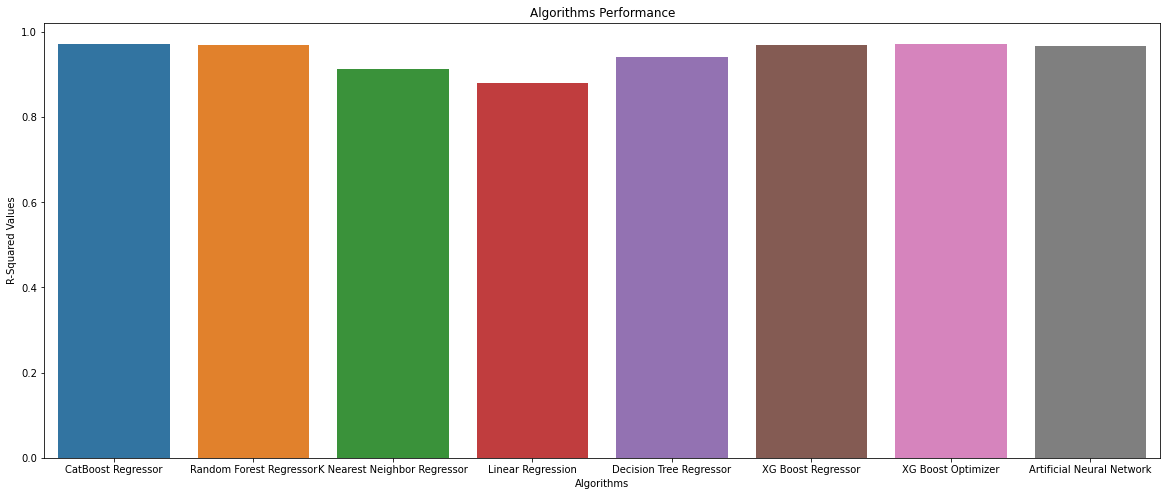

In [56]:
# Bar plot of different regressor algorithms
# plotted between Algorithms Vs R-Squared Values
plt.figure(figsize = (20, 8))
sns.barplot(x = list(algo_score.keys()), y = list(algo_score.values()))
plt.title("Algorithms Performance")
plt.xlabel("Algorithms")
plt.ylabel("R-Squared Values")
plt.show()

In [57]:
# Printing all the regressor algorithms and their R-squared values from the output/results obtained
for key, val in algo_score.items():
    print(key, '--->', val)

CatBoost Regressor ---> 0.9727203115557338
Random Forest Regressor ---> 0.9696379709830232
K Nearest Neighbor Regressor ---> 0.9132223828312239
Linear Regression ---> 0.8811265397920298
Decision Tree Regressor ---> 0.9403369103886315
XG Boost Regressor ---> 0.9703409801033837
XG Boost Optimizer ---> 0.970956741919004
Artificial Neural Network ---> 0.966464335849723


In [61]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "R-Squared values"])
  
# Add rows
myTable.add_row(["CAT Boost Regressor","0.9727203115557338"])
myTable.add_row(["Random Forest Regressor","0.969623951427643"])
myTable.add_row(["K Nearest Neighbor Regressor", "0.9116504039294485"])
myTable.add_row(["Linear Regression", " 0.8812456820746711"])
myTable.add_row(["Decision Tree Regressor", "0.9400653150767918"])
myTable.add_row(["XG Boost Regressor", "0.9703281842649443"])
myTable.add_row(["XG Boost Optimizer", "0.9709879382816159"])
myTable.add_row(["Artificial Neural Network", "0.9670964102180357"])
  
print(myTable)

+------------------------------+---------------------+
|          Algorithm           |   R-Squared values  |
+------------------------------+---------------------+
|     CAT Boost Regressor      |  0.9727203115557338 |
|   Random Forest Regressor    |  0.969623951427643  |
| K Nearest Neighbor Regressor |  0.9116504039294485 |
|      Linear Regression       |  0.8812456820746711 |
|   Decision Tree Regressor    |  0.9400653150767918 |
|      XG Boost Regressor      |  0.9703281842649443 |
|      XG Boost Optimizer      |  0.9709879382816159 |
|  Artificial Neural Network   |  0.9670964102180357 |
+------------------------------+---------------------+


In [62]:
# finding the best performing regressor algorithm and its R-squared value
maxi = 0
best_algo = ""
for key, val in algo_score.items():
    if val > maxi:
        maxi = val
        best_algo = key
print("Best Performing Algorithm is :---> ", best_algo)
print("R-Squared :---> ", maxi)

Best Performing Algorithm is :--->  CatBoost Regressor
R-Squared :--->  0.9727203115557338


In [63]:
import pickle

pickle_out = open("CBR.pkl", "wb")
pickle.dump(CBR, pickle_out)
pickle_out.close()